In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast

import plotly.graph_objs as go
import plotly.offline as py

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree



# Data Cleaning

Before I begin creating the visuals that will aid my project, I am first going to clean all of my datasets and make sure each of them are clean, easy to understand, and ready to be used. I will be going through each dataset one by one to avoid confusion. 


### The Best New Artist Grammy Winners List 

**Reading the datasets**

In [117]:
best_new = pd.read_csv('best_new2.csv')
best_new_df = pd.DataFrame(best_new)
best_new_df


,award_date,artist
0,"February 27, 1980",Rickie Lee Jones
1,"February 25, 1981",Christopher Cross
2,"February 24, 1982",Sheena Easton
3,"February 23, 1983",Men At Work
4,"February 28, 1984",Culture
5,"February 26, 1985",Cyndi Lauper
6,"February 25, 1986",Sade
7,"February 24, 1987",Bruce Hornsby & The Range
8,"March 2, 1988",Jody Watley
9,"February 22, 1989",Tracy Chapman


In [118]:
# will be focusing on artists start from 1985

# dropping the first five columns (1980-1984 winners)
best_new_df = best_new_df.drop(best_new_df.index[:5])

**Checking the Data Types**

In [119]:
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   award_date  38 non-null     object
 1   artist      38 non-null     object
dtypes: object(2)
memory usage: 740.0+ bytes


The "award_date" column is labeled as an object, let's change this to a date/time data type. 

In [120]:
best_new_df['award_date'] = pd.to_datetime(best_new_df['award_date'])

best_new_df.head()

,award_date,artist
5,1985-02-26,Cyndi Lauper
6,1986-02-25,Sade
7,1987-02-24,Bruce Hornsby & The Range
8,1988-03-02,Jody Watley
9,1989-02-22,Tracy Chapman


In [121]:
# checking the data types again 
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   award_date  38 non-null     datetime64[ns]
 1   artist      38 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 740.0+ bytes


In [122]:
# checking for missing values
best_new_df.isna().sum()

award_date    0
artist        0
dtype: int64

These columns in the dataset now have the nessecary data types and do not have missing values.

### The Billboard Hot 100s Chart Data Cleanup 

**Reading the data**

In [10]:
hot100_read = pd.read_csv('chart_data.csv')

hot100_df = pd.DataFrame(hot100_read)

hot100_df

,week_of,rank,song_title,artist_name,peak_position
0,2024-02-03,1,Lovin On Me,Jack Harlow,1
1,2024-02-03,2,Cruel Summer,Taylor Swift,3
2,2024-02-03,3,Greedy,Tate McRae,4
3,2024-02-03,4,Lose Control,Teddy Swims,8
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,6
...,...,...,...,...,...
199995,1985-10-12,96,Everytime You Go Away,Paul Young,84
199996,1985-10-12,97,Janet,Commodores,92
199997,1985-10-12,98,Forever,Kenny Loggins,98
199998,1985-10-12,99,A Little Bit of Heaven,Natalie Cole,97


In [11]:
# dropping peak position

hot100_df = hot100_df.drop('peak_position', axis = 'columns')

**Why did I drop this column?**

Of the bat, I decided to remove the peak postion column as I will not be using this column in any of my future modeling or visualizations. Furthermore, I can easily find the highest chart postion a song or artist received by using the rank column.

In [12]:
#checking the new dataset
hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


**Checking the Data Types of the dataset**

In [13]:
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   week_of      200000 non-null  object
 1   rank         200000 non-null  int64 
 2   song_title   200000 non-null  object
 3   artist_name  200000 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


The "week_of" column is labeled as an object data type. Below I will go ahead and change this to a date/time data type. 

In [14]:
# Adjusting the data type of the week_of column

hot100_df['week_of'] = pd.to_datetime(hot100_df['week_of'])

hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


In [15]:
# Checking the data types again
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   week_of      200000 non-null  datetime64[ns]
 1   rank         200000 non-null  int64         
 2   song_title   200000 non-null  object        
 3   artist_name  200000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.1+ MB


Now all of the columns have the necessary data types. Furthermore, the .info() function also tells me that there are no missing values in this dataset. Below I will further ensure this fact. 

In [16]:
# Checking the number of missing values
hot100_df.isna().sum()

week_of        0
rank           0
song_title     0
artist_name    0
dtype: int64

No mising values in this dataset!

## Splitting the columns 

Songs may feature one or many artists, which is addressed in different ways in the a song's title and credits. Since I will be directly dealing with the songs on the Billboard Hot 100 Charts, I want to analyze each artist involved in making the song. This is because I will be looking for the number of singles each artist in the "best_new" dataset has had on the charts throughout the years. To do this, I have to split the artist_name column into separate columns, as multiple song artists may be listed in a single column, thus being regarded as a single entity. I will split this column into several featured_artists columns. 


In [17]:
# creating a copy of the original hot 100s dataset
hot100_split = hot100_df

### First Split

The first split I will do is going to simply separate the artists listed before the word (and its variations) "featuring". 

In [18]:
# Defining the diferrent variations of the word "featuring" 
# This variable will be used as the seperator to split a string of artists
separator_pattern_feat = r'\s+(?:Featuring|feat|ft|Feat|Ft|featuring)\b\s+'


#spliting the column 
split_artists = hot100_split['artist_name'].str.split(separator_pattern_feat, 
                                                      n = 1, 
                                                      expand = True)


# Adding the new split columns to the hot100_split dataset 
hot100_split['main_artist'] = split_artists[0]

hot100_split['featured_artists'] = split_artists[1]




hot100_split.head()

,week_of,rank,song_title,artist_name,main_artist,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves


### Second Split 

Investigating this dataset made me recall the fact that some songs may have various main artists. Songs with two or more artists do not always label the other artists as features. There are cases where the artists may have equally collaborated/worked on or both have equal strength on a song. In these cases, these songs may list more than one artist as a main artist of a song, rather than a featured artist of a song. Before continuing to separate the featured artists column, I will go ahead and split the main_artist column (using "and" variations) to ensure that the different artists are represented individually. 

However, I do have to be aware that three of the artists in the best_new data include "&" in their band/group names. These artists include: Bruce Hornsby & The Range, Hootie & The Blowfish, and Macklemore & Ryan Lewis. When creating the separator pattern variable, I will ensure to include the exceptions of these instances in order to avoid spliting these bands into unnecassary entities.  

In [19]:
# New variable to define the diferrent variations of the word "and"
# includes the exceptions of specific words from groups that shouldn't be split
separator_pattern_main = r'\s+(?:&(?! The Range| The Blowfish| Ryan Lewis)|(?i)and(?! The Range| The Blowfish| Ryan Lewis))\s+'


# splitting the 'main_artist' column based on the separator pattern
split_main_artists = hot100_split['main_artist'].str.split(separator_pattern_main, expand = True)

# renaming the split columns
split_main_artists.columns = [f'main_artist_{i + 1}' for i in range(split_main_artists.shape[1])]

# Concatenate the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
hot100_split2 = pd.concat([hot100_split, split_main_artists], axis = 1)


hot100_split2.head()


,week_of,rank,song_title,artist_name,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None,Jack Harlow,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None,Taylor Swift,None,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None,Tate McRae,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None,Teddy Swims,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves,Zach Bryan,None,None


Going ahead and dropping the 'artist_name' and 'main_artist'column as that is no longer needed. I am also going to reorder the columns for easier understanding. This will also help for the next split.  

In [20]:
# dropping two columns
hot100_split2 = hot100_split2.drop(['artist_name', 'main_artist'], axis = 1)

# reordering the remaining columns
hot100_split2 = hot100_split2.iloc[:, [0,1,2,4,5,6,3]]

hot100_split2


,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves
...,...,...,...,...,...,...,...
199995,1985-10-12,96,Everytime You Go Away,Paul Young,None,None,None
199996,1985-10-12,97,Janet,Commodores,None,None,None
199997,1985-10-12,98,Forever,Kenny Loggins,None,None,None
199998,1985-10-12,99,A Little Bit of Heaven,Natalie Cole,None,None,None


### Third Split

Now I want to focus on splitting the featured_artists column. This is because their are many instances where there are more than one artist featured in a song, so I just want to ensure that each featured artist is seperated into their own column. However I will do this in two steps. Why?

Below are examples of how the featured artists are listed in this column: 

'main artist' feat. :

    - artist 1, artist 2, artist 3 & artist 4
    - artist 1 & artist 2

**Step 1**: I am first going to seperate the entities before and after the "and" variations. This will ensure that the artist after the "and" is successfully seperated. 

**Step 2**: After completing step one, I will then go ahead and seperate all of the artists seperated by the commas. 

This will successfully split all of the featured artists in an organized and systematic way. 

In [21]:
# new variable to define the different variations of the word "and"
separator_pattern_and = r'\s+(?:&|and|And|,)\s+'

# splitting the featured_artists column
split_artists = hot100_split2['featured_artists'].str.split(separator_pattern_and, expand = True)

# renaming the split columns
split_artists.columns = [f'featured_artist_{i + 1}' for i in range(split_artists.shape[1])]

# concatenating the split columns with the previous split dataset 
# creating a new df to avoid confusion and record each change made
hot100_split3 = pd.concat([hot100_split2, split_artists], axis = 1)

hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,Kacey Musgraves,None,None


Now I can go ahead and drop the featured_artists column as it will no longer be used. 

In [22]:
#dropping the featured artist column 
hot100_split3 = hot100_split3.drop(['featured_artists'], axis = 1)

In [23]:
hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None


### Fourth (last) Split

In [24]:
# the seperator in this split is just a comma
split_feats = hot100_split3['featured_artist_1'].str.split(',', expand = True)

# renaming the split columns
split_feats.columns = [f'featured_artist_{i + 4}' for i in range(split_feats.shape[1])]


# concatenating the split columns with the previous split dataset
# creating a new df to avoid confusion and record each change made
hot100_split4 = pd.concat([hot100_split3, split_feats], axis = 1)


hot100_split4.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,Kacey Musgraves,None,None,None,None,None,None,None


The "featured_artist_1" and "featured_artist_4" columns are the same columns, therefore I will drop the "featured_artist_1" column to avoid redundancy.

In [25]:
# dropping the featured_artist_1 column
hot100_split4 = hot100_split4.drop('featured_artist_1', axis = 'columns')

hot100_split4.head()


,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,None,None,Kacey Musgraves,None,None,None,None,None,None,None


Below I will reorder the columns in order to arrange them in a logical manner, as well as rename some of the columns to more descriptive names. 

In [26]:
# reordering the columns for easier readability
hot100_split4 = hot100_split4.iloc[:, [0,1,2,3,
                                       4,5,8,9,
                                       10,11,6,7,
                                       12,13,14,15]]

# renaming column headers
hot100_split4.columns = ['chart_week', 'rank', 'song_title', 'main_artist_1', 'main_artist_2', 'main_artist_3',
                       'featured_artist_1', 'featured_artist_2', 'featured_artist_3', 'featured_artist_4', 
                        'featured_artist_5', 'featured_artist_6', 'featured_artist_7', 'featured_artist_8',
                       'featured_artist_9', 'featured_artist_10']
hot100_split4.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,None,None,None,None,None,None,None


After looking through the dataset, I realized there are some instances of the values having a leading white space. This could cause many issues and misinformation in future models and visualizations. I will go ahead and rectify this issue.

In [27]:
# applying the strip() function to values in each object labeled column
for col in hot100_split4.iloc[:, 2:]:
    hot100_split4[col] = hot100_split4[col].str.strip()

In [28]:
hot100_split4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   chart_week          200000 non-null  datetime64[ns]
 1   rank                200000 non-null  int64         
 2   song_title          200000 non-null  object        
 3   main_artist_1       200000 non-null  object        
 4   main_artist_2       12370 non-null   object        
 5   main_artist_3       159 non-null     object        
 6   featured_artist_1   31787 non-null   object        
 7   featured_artist_2   1476 non-null    object        
 8   featured_artist_3   540 non-null     object        
 9   featured_artist_4   148 non-null     object        
 10  featured_artist_5   6329 non-null    object        
 11  featured_artist_6   30 non-null      object        
 12  featured_artist_7   87 non-null      object        
 13  featured_artist_8   16 non-nu

All of the data types are correct for this dataset. 

### New Dataset 

Now that I finished splitting the artists in the Billboard Hot 100 dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset are on the charts. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those speciic artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [29]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_hot100 = hot100_split4[
    (hot100_split4['main_artist_1'].isin(selected_artists)) |
    (hot100_split4['main_artist_2'].isin(selected_artists)) |
    (hot100_split4['main_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_1'].isin(selected_artists)) |
    (hot100_split4['featured_artist_2'].isin(selected_artists)) |
    (hot100_split4['featured_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_4'].isin(selected_artists)) |
    (hot100_split4['featured_artist_5'].isin(selected_artists)) |
    (hot100_split4['featured_artist_6'].isin(selected_artists)) |
    (hot100_split4['featured_artist_7'].isin(selected_artists)) |
    (hot100_split4['featured_artist_8'].isin(selected_artists)) |
    (hot100_split4['featured_artist_9'].isin(selected_artists)) |
    (hot100_split4['featured_artist_10'].isin(selected_artists))
]


filtered_hot100.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
22,2024-02-03,23,What Was I Made For?,Billie Eilish,None,None,None,None,None,None,None,None,None,None,None,None
24,2024-02-03,25,Houdini,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
35,2024-02-03,36,Dance The Night,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
37,2024-02-03,38,Vampire,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None
53,2024-02-03,54,Get Him Back!,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_hot100 dataset. The reason for this is that some songs have more artists on a song than others, leaving some songs with null values in the main/featured columns. 

I want to make this dataset as easy to read as possible, therefore I want to combine the three main artist columns into ONE main artist column and the 10 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song listed on the Billboard Hot 100s, the main artist column will be listed as yes, while the featured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset as well as the massive amount of null values in the dataset. 

To do this I will:

- make a copy of the filtered_100s df to not corrupt the original filtered dataset and avoid confusion.
- Create three new columns: main_artist, featured_artist, artist.
- main_artist and featured_artist: Will have "no" values as default
- artist: Will have None value as default
- Iterate through each row in the filtered_df copy and focus on the three main artist columns. 
- Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists are present in any of the three columns. 
- If they are present, then the main_artist column will be marked as yes.
- If they are not present, then the featured_artists will be marked as yes.
- assign the searched artists name to the artists column
    


In [30]:
# filtered_hot100s copy
filtered_hot100_copy = filtered_hot100

In [31]:
# making new columns for main_artist and featured_artist
filtered_hot100_copy['main_artist'] = 'no' # default = no 
filtered_hot100_copy['featured_artist'] = 'no' # default = no 
filtered_hot100_copy['artist'] = None  # default = None

# iterating through each row in filtered_hot100_copy
for index, row in filtered_hot100_copy.iterrows():
    
    # checking if any of the selected artists are in columns 4, 5, or 6
    if any(artist in row.values[3:6] for artist in selected_artists):
        filtered_hot100_copy.at[index, 'main_artist'] = 'yes' # marking yes
    else:
        filtered_hot100_copy.at[index, 'featured_artist'] = 'yes'  # marking yes
    
    # assigning the name of the searched artist to the new column
    for artist in selected_artists:
        if artist in row.values[3:]: 
            #if the artists is found in any column, assign the name of the artist to new column
            filtered_hot100_copy.at[index, 'artist'] = artist
            break  # stop searching once the artist is found

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/1542029445.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/1542029445.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/1542029445.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [32]:
# reordering the columns 
filtered_hot100_copy = filtered_hot100_copy.iloc[:, [18,0,1,2,16,17]]

In [33]:
filtered_hot100_copy.head()

,artist,chart_week,rank,song_title,main_artist,featured_artist
22,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no
24,Dua Lipa,2024-02-03,25,Houdini,yes,no
35,Dua Lipa,2024-02-03,36,Dance The Night,yes,no
37,Olivia Rodrigo,2024-02-03,38,Vampire,yes,no
53,Olivia Rodrigo,2024-02-03,54,Get Him Back!,yes,no


### Checking for Outliers

I will be checking for outliers in the rank column to ensure there are no odd values in the column. In this chart, a song can be rank between 1 and 100.

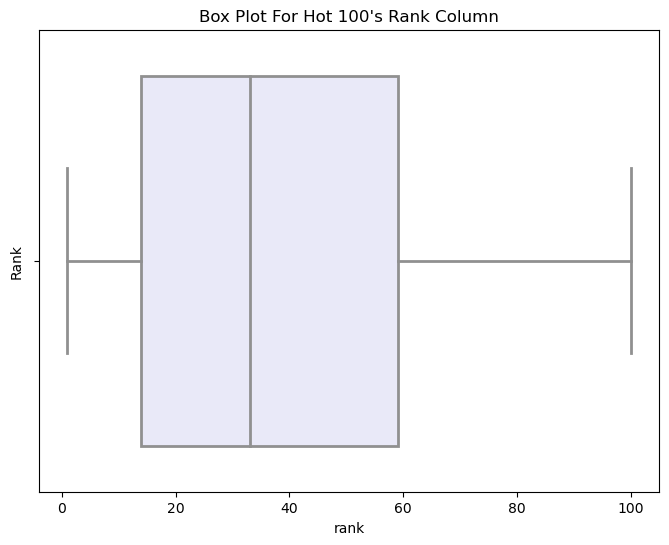

In [34]:
# creatign the boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_hot100_copy, x='rank', orient='h', linewidth=2, color='lavender')
plt.title("Box Plot For Hot 100's Rank Column")
plt.ylabel('Rank')
plt.show()

There are no outliers in the rank column! 

In [35]:
filtered_hot100_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8622 entries, 22 to 199389
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           8622 non-null   object        
 1   chart_week       8622 non-null   datetime64[ns]
 2   rank             8622 non-null   int64         
 3   song_title       8622 non-null   object        
 4   main_artist      8622 non-null   object        
 5   featured_artist  8622 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 729.6+ KB


Information about this dataset:

- 8622 observations
- 6 features 
    - 4 are categorical
    - 1 is a date/time data type
    - 1 is numerical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

### Artist's Albums Information

**Reading the dataset**

In [36]:
artist_albums = pd.read_csv('artist_album_info.csv')
artist_albums_df = pd.DataFrame(artist_albums)
artist_albums_df.head()

,artist,album_names,release_date,type
0,Rickie Lee Jones,"['Pieces of Treasure', 'Kicks', 'The Other Sid...","['2023-04-28', '2019-06-07', '2015-06-23', '20...","['album', 'album', 'album', 'album', 'album', ..."
1,Christopher Cross,"['Take Me As I Am', 'Secret Ladder', 'A Night ...","['2017-10-31', '2014-09-12', '2013-03-08', '20...","['album', 'album', 'album', 'album', 'album', ..."
2,Sheena Easton,"['The Definitive Singles 1980 - 1987', '15 Cla...","['2021-09-17', '2013-05-03', '2000-11-13', '20...","['album', 'album', 'album', 'album', 'album', ..."
3,Men At Work,"['Live in Christchurch 1982', 'Down Under 2011...","['2020-08-01', '2011-06-04', '1998-05-07', '19...","['album', 'album', 'album', 'album', 'album', ..."
4,Culture,"['Life', 'Live at Wembley - World Tour 2016', ...","['2019-05-01', '2017-12-08', '2003-01-01', '20...","['album', 'album', 'album', 'album', 'album', ..."


In [37]:
# similar to the best_new_df, will be dropping the first five rows
artist_albums_df = artist_albums_df.drop(artist_albums_df.index[:5])
artist_albums_df = artist_albums_df.reset_index()
artist_albums_df

,index,artist,album_names,release_date,type
0,5,Cyndi Lauper,"['True Colors (35th Anniversary Edition)', 'Sp...","['2021-10-15', '2016-06-24', '2016-05-06', '20...","['album', 'album', 'album', 'album', 'album', ..."
1,6,Sade,"['Bring Me Home - Live 2011', 'Soldier of Love...","['2012-05-07', '2010-02-08', '2002-02-18', '20...","['album', 'album', 'album', 'album', 'album', ..."
2,7,Bruce Hornsby & The Range,"['Deep Sea Vents', 'Spirit Trail 25th Annivers...","['2024-03-01', '2023-10-27', '2022-05-27', '20...","['album', 'album', 'album', 'album', 'album', ..."
3,8,Jody Watley,"['Paradise', 'Curvve Classics', 'The Makeover'...","['2014-07-28', '2008-10-24', '2006-08-08', '20...","['album', 'album', 'album', 'album', 'album', ..."
4,9,Tracy Chapman,"['Our Bright Future', 'Where You Live', 'Let I...","['2008-11-07', '2005-09-05', '2002-10-15', '20...","['album', 'album', 'album', 'album', 'album', ..."
5,10,Milli Vanilli,"['All Or Nothing US Remix Album', 'All Or Noth...","['1989-06-26', '1988-11-14', '2023-11-24', '20...","['album', 'album', 'single', 'single', 'single..."
6,11,Mariah Carey,"['Music Box: 30th Anniversary Edition', 'Butte...","['2023-09-08', '2022-09-16', '2020-12-11', '20...","['album', 'album', 'album', 'album', 'album', ..."
7,12,Marc Cohn,"['The Complete Atlantic Albums', 'Work To Do',...","['2020-10-16', '2019-08-09', '2019-05-17', '20...","['album', 'album', 'album', 'album', 'album', ..."
8,13,Arrested Development,"['Bullets In The Chamber', 'On The Cutting Roo...","['2024-01-12', '2023-03-17', '2021-12-10', '20...","['album', 'album', 'album', 'album', 'album', ..."
9,14,Toni Braxton,"['Spell My Name', 'Sex & Cigarettes', 'Love, M...","['2020-08-28', '2018-03-23', '2014-01-01', '20...","['album', 'album', 'album', 'album', 'album', ..."


This dataset looks a little complex. Basically this dataset contains information on the albums each Best New artists winner has released. Along with this, the albums release date and album type is also included in this dataset. 

The complicated aspect of this dataset is that the "album_names", "release_date", and "type" columns contain list values, which respectively correspond to the artist. 

The dataset as is contains string represenations of lists, so technically it is not reading as an actual list. To fix this, I will use the ast library to convert the values in 'album_names', 'release_date', and 'type' columns into actual lists. 

From here I will utilize the .explode() function to split each element in the lists into a seperate row. I will do this for each column that contains list values ('album_names', 'release_date', 'type') to preserve the consitency of the album information. After exploding these columns, I will merge that column with the 'artist_name' column from the original dataset so that the artist's can correctly represetation there respective albums. 

In [38]:
# converting the string lists to actual lists for the three specified columns

artist_albums_df['album_names'] = artist_albums_df['album_names'].apply(ast.literal_eval)
artist_albums_df['release_date'] = artist_albums_df['release_date'].apply(ast.literal_eval)
artist_albums_df['type'] = artist_albums_df['type'].apply(ast.literal_eval)

Now the three columns contain list values!

In [39]:
# applyng the explode function to the three columns
explode_columns = ['album_names', 'release_date', 'type']

# new df to hold the newly exploded rows
# lambda will take each row and apply the explode function to it
explode_df = artist_albums_df[explode_columns].apply(lambda x: x.explode())

# adding a column to store the index numbers of each row
# this will be merged with the original df
explode_df['index_stored'] = explode_df.index

explode_df.head()

,album_names,release_date,type,index_stored
0,True Colors (35th Anniversary Edition),2021-10-15,album,0
0,Spotify Sessions,2016-06-24,album,0
0,Detour,2016-05-06,album,0
0,She's So Unusual - Spotify Commentary,2014-04-01,album,0
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,0


In [40]:
# merging the og dataset and the exploded dataset to create new df
artist_album_expand = explode_df.merge(artist_albums_df['artist'], 
                                       left_on = 'index_stored', 
                                       right_index = True)


In [41]:
artist_album_expand.head()

,album_names,release_date,type,index_stored,artist
0,True Colors (35th Anniversary Edition),2021-10-15,album,0,Cyndi Lauper
0,Spotify Sessions,2016-06-24,album,0,Cyndi Lauper
0,Detour,2016-05-06,album,0,Cyndi Lauper
0,She's So Unusual - Spotify Commentary,2014-04-01,album,0,Cyndi Lauper
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,0,Cyndi Lauper


From here I am going to drop the 'index_stored' column from this new dataframe, as it is no longer needed. I will also reorder this new dataframe to have the columns arranged in a logical way. 

In [42]:
# dropping the index_stored column
artist_album_expand = artist_album_expand.drop('index_stored', axis = 'columns')

artist_album_expand.head()

,album_names,release_date,type,artist
0,True Colors (35th Anniversary Edition),2021-10-15,album,Cyndi Lauper
0,Spotify Sessions,2016-06-24,album,Cyndi Lauper
0,Detour,2016-05-06,album,Cyndi Lauper
0,She's So Unusual - Spotify Commentary,2014-04-01,album,Cyndi Lauper
0,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album,Cyndi Lauper


In [43]:
# reordering the columns 
artist_album_expand = artist_album_expand.iloc[:, [3,0,1,2]]

artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
0,Cyndi Lauper,Spotify Sessions,2016-06-24,album
0,Cyndi Lauper,Detour,2016-05-06,album
0,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
0,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


In [44]:
# resetting the index
artist_album_expand = artist_album_expand.reset_index()

artist_album_expand

,index,artist,album_names,release_date,type
0,0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,0,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,0,Cyndi Lauper,Detour,2016-05-06,album
3,0,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,0,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album
...,...,...,...,...,...
750,37,Olivia Rodrigo,"Wondering (From ""High School Musical: The Musi...",2019-11-12,single
751,37,Olivia Rodrigo,"I Think I Kinda, You Know (From ""High School M...",2019-11-08,single
752,37,Olivia Rodrigo,"Let It Glow (From ""Frozen Northern Lights"")",2016-11-11,single
753,37,Olivia Rodrigo,Bizaardvark (Music from the TV Series),2016-10-07,single


In [45]:
# dropping the 'index' column
artist_album_expand = artist_album_expand.drop('index', axis = 'columns')

artist_album_expand

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album
...,...,...,...,...
750,Olivia Rodrigo,"Wondering (From ""High School Musical: The Musi...",2019-11-12,single
751,Olivia Rodrigo,"I Think I Kinda, You Know (From ""High School M...",2019-11-08,single
752,Olivia Rodrigo,"Let It Glow (From ""Frozen Northern Lights"")",2016-11-11,single
753,Olivia Rodrigo,Bizaardvark (Music from the TV Series),2016-10-07,single


Now that this dataset in ready to go, I am going to investigate and get familar with the dataset. Adjust the datatypes and any other issues. 

**Fixing Data Types**

In [46]:
artist_album_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        755 non-null    object
 1   album_names   755 non-null    object
 2   release_date  755 non-null    object
 3   type          755 non-null    object
dtypes: object(4)
memory usage: 23.7+ KB


It looks like the 'release_date' column is labeled as an object data type instead of a date/time datatype. I will go ahead and fix this below. 

In [47]:
# checking to see instances where date is only year. 
only_year_count = 0



for value in artist_album_expand['release_date']:
    string_length = len(value)
    if string_length == 4:
        only_year_count += 1
        print(value)
        
only_year_count      

2018
1985
2000
1995
1988
1987
2001
1998
1989
1992
2001
1993
2000
1999
1996
1999
2001
2000
1999
2008
1989
2004
2002
2009
2006
2003
2006


27

There are 35 instances where Spotify did not provide us with an exact release date for certain albums/singles/compliations. Therefore the to_datetime function does not work as some dates are formatted like "mm-dd-yyyy" and others are formatted as "yyyy". To fix this, I have chosen to format the dates that are only years to '01-01-yyyy'. This will serve as a a general/estimated date of when these albums/singles/compliations were released. 

In [48]:
# identifying the instances where only the year is provided
only_year = artist_album_expand['release_date'].apply(lambda x: len(str(x))) == 4


In [49]:
# setting the day and month to 01 for the respective year
artist_album_expand.loc[only_year, 'release_date'] = pd.to_datetime(artist_album_expand.loc[only_year, 'release_date'] + '-01-01')


artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


Now that all the values in the 'release_date' column follow the same format, I can now go ahead and change the column's data type. 

In [50]:
# changing the release_date data type
artist_album_expand['release_date'] = pd.to_datetime(artist_album_expand['release_date'])

artist_album_expand.head()

,artist,album_names,release_date,type
0,Cyndi Lauper,True Colors (35th Anniversary Edition),2021-10-15,album
1,Cyndi Lauper,Spotify Sessions,2016-06-24,album
2,Cyndi Lauper,Detour,2016-05-06,album
3,Cyndi Lauper,She's So Unusual - Spotify Commentary,2014-04-01,album
4,Cyndi Lauper,She's So Unusual: A 30th Anniversary Celebrati...,2014-03-28,album


In [51]:
artist_album_expand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   artist        755 non-null    object        
 1   album_names   755 non-null    object        
 2   release_date  755 non-null    datetime64[ns]
 3   type          755 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.7+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 755 observations
- 4 features
    - 3 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



### Artist's Corresponding Genre 

**Reading the dataset**

In [52]:
artist_genres = pd.read_csv('artist_general_info.csv')
artist_genres_df = pd.DataFrame(artist_genres)
artist_genres_df.head()

,artist,genre,followers,popularity
0,Rickie Lee Jones,"['folk', 'singer-songwriter']",194186,44
1,Christopher Cross,"['mellow gold', 'soft rock', 'yacht rock']",991746,63
2,Sheena Easton,"['mellow gold', 'minneapolis sound', 'new roma...",663311,54
3,Men At Work,"['album rock', 'australian rock', 'classic roc...",1213416,67
4,Culture,"['new romantic', 'new wave', 'new wave pop', '...",1527866,63


In [53]:
# similar to the best_new_df, will be dropping the first five rows
artist_genres_df = artist_genres_df.drop(artist_genres_df.index[:5])
artist_genres_df = artist_genres_df.reset_index()
artist_genres_df.head()

,index,artist,genre,followers,popularity
0,5,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'...",2574782,71
1,6,Sade,"['british soul', 'sophisti-pop']",3643971,73
2,7,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'...",394117,53
3,8,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis...",310445,38
4,9,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women...",1678918,73


First and foremost, I will go ahead a drop the 'followers' and 'popularity' column. I have no need for these two columns as they were calculated through Spotify with a specific algorithm. I will determine the success of an artists on my own later on. I will also drop the index column

In [54]:
# dropping the three columns
artist_genres_df = artist_genres_df.drop(['followers', 'popularity', 'index'], axis = 'columns')

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'..."
1,Sade,"['british soul', 'sophisti-pop']"
2,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'..."
3,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis..."
4,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women..."


I am going to go ahead and remove the brackets and quotations surring the genres. 

Since many artists associate with several dfferent genres, rather than only choosing one genre to represent the artist, I made the decision to keep them all. As I stated, a lot of artists do not only follow one genre, and may tap into many different throughout the years and within their songs. Therefore, I want to represent this within my analysis.

In this case, each artist will have a string of genre/s associated with them in the genre column. This will allow me to analyze the popular genre keywords that the best new artist winners share in common.  

In [55]:
# Remove the brackets using string slicing via the .str accessor
artist_genres_df['genre'] = artist_genres_df['genre'].str[1:-1]
artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"'dance pop', 'new wave pop', 'permanent wave',..."
1,Sade,"'british soul', 'sophisti-pop'"
2,Bruce Hornsby & The Range,"'album rock', 'heartland rock', 'mellow gold',..."
3,Jody Watley,"'contemporary r&b', 'freestyle', 'minneapolis ..."
4,Tracy Chapman,"'folk', 'lilith', 'singer-songwriter', ""women'..."


In [56]:
#removing the quotes
artist_genres_df['genre'] = artist_genres_df['genre'].str.replace("'", "")

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"dance pop, new wave pop, permanent wave, soft ..."
1,Sade,"british soul, sophisti-pop"
2,Bruce Hornsby & The Range,"album rock, heartland rock, mellow gold, piano..."
3,Jody Watley,"contemporary r&b, freestyle, minneapolis sound..."
4,Tracy Chapman,"folk, lilith, singer-songwriter, ""womens music"""


In [57]:
artist_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  38 non-null     object
 1   genre   38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


Information about this dataset:

- 38 observations
- 2 features 
    - Both are categorical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

## MTV Video Music Award Winners/Nominees 

**Reading the dataset**

In [58]:
vmas_awards = pd.read_csv('vmas_winners_nominees2.csv')
vmas_awards_df = pd.DataFrame(vmas_awards)
vmas_awards_df.head()

,date,award_category,artist_name,win
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes
1,1985-09-13,Best Art Direction In a Video,Culture Club,No
2,1985-09-13,Best Art Direction In a Video,Madonna,No
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No


Very similar to the Billboard Hot100s split I had to do to the dataset, I will be splitting the vmas_awards_df too. This is because of the fact that the songs that won or were nominated may have more than one main artist on it, as well as more than one or more featured artists. That steps I will take are as follows:

1. Splitting the main artists from the featured artists using variations of the seperator "featuring".
    - will split them into two columns, main_artist and featured_artist column
2. Splitting the main artists by commas.
    - Split in seperate main_artist columns (main_artist_1, main_artist_2, etc.)
3. Splitting the featured artists by comma.
    - Split in seperate featured_artist columns (featured_artist_1, featured_artist_2, etc.)

In [59]:
# making copy of the original vmas_awards_df
vmas_copy = vmas_awards_df

### First Split

In [60]:
vmas_split1 = vmas_copy['artist_name'].str.split('Feat.|feat.|Feat|feat', n = 1, expand = True)


vmas_copy['main_artist'] = vmas_split1[0]

vmas_copy['featured_artists'] = vmas_split1[1]

vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None


### Second Split

While the main artists were intially seperated by commas during the data collection process, one artist's stage name includes a comma. Therefore, I will account for this artist when seperating the main artist column. The artist Tyler, the Creator will be an exception for this split. 

In [61]:
vmas_split2 = vmas_copy['main_artist'].str.split(r'(?<!Tyler),\s*', expand = True)

vmas_split2.columns = [f'main_artist_{i+1}' for i in range(vmas_split2.shape[1])]


# Concatenate the split columns with the original DataFrame
vmas_copy = pd.concat([vmas_copy, vmas_split2], axis=1)

vmas_copy.reset_index(drop=True, inplace=True)
vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None


### Third Split

In [62]:
vmas_split3 = vmas_copy['featured_artists'].str.split(',', expand = True)

vmas_split3.columns = [f'featured_artist_{i+1}' for i in range(vmas_split3.shape[1])]


# Concatenate the split columns with the original DataFrame
vmas_copy = pd.concat([vmas_copy, vmas_split3], axis=1)

vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None,None,None,None,None,None,None


since artist_name, featured_artists, and main_artists have the same information that is contained in the split columns, I will be dropping these three.

In [63]:
# dropping the three columns
vmas_copy = vmas_copy.drop(['artist_name', 'featured_artists', 'main_artist'], axis = 'columns')

vmas_copy.head()

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Yes,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,No,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,No,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,No,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,No,Simple Minds,None,None,None,None,None,None,None,None,None,None


In [64]:
# removing the possible white spaces the strings have from splitting
for col in vmas_copy.iloc[:, 3:]:
    vmas_copy[col] = vmas_copy[col].str.strip()

**Filtered VMAS Dataset**

Now that I finished splitting the artists in the VMAS Awards dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset won or were nominated for an award. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those speciic artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [65]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_vmas = vmas_copy[
    (vmas_copy['main_artist_1'].isin(selected_artists)) |
    (vmas_copy['main_artist_2'].isin(selected_artists)) |
    (vmas_copy['main_artist_3'].isin(selected_artists)) |
    (vmas_copy['main_artist_4'].isin(selected_artists)) |
    (vmas_copy['main_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_1'].isin(selected_artists)) |
    (vmas_copy['featured_artist_2'].isin(selected_artists)) |
    (vmas_copy['featured_artist_3'].isin(selected_artists)) |
    (vmas_copy['featured_artist_4'].isin(selected_artists)) |
    (vmas_copy['featured_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_6'].isin(selected_artists)) 
]


filtered_vmas

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,2022-08-28,Song of Summer,No,Latto,None,None,None,None,Mariah Carey,DJ Khaled,None,None,None,None
4012,2022-08-28,Song of the Year,Yes,Billie Eilish,None,None,None,None,None,None,None,None,None,None
4015,2022-08-28,Song of the Year,No,Adele,None,None,None,None,None,None,None,None,None,None
4016,2022-08-28,Song of the Year,No,Elton John,None,None,None,None,Dua Lipa,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_vmas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with columns with null values the main/featured columns. 

I want to make this datset as easy to read as possible, therefore I want to combine the five main artist columns into ONE main artist column and the 6 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song that was nominated or won in the VMAS, the main artist column will be listed as yes, while the fetaured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset as well as the massive amount of null values in the dataset. 

To do this I will:

    - make a copy of the filtered_vmas df to not corrupt the original filtered dataset and avoid confusion.
    - Create three new columns: main_artist, featured_artist, artist.
        - main_artist and featured_artist: Will have "no" values as default
        - artist: Will have None values as default
    - Iterate through each row in the filtered_vmas df copy and focus on the five main artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the three columns. 
        - If they are present, then the main_artist column will be marked as yes.
        - If they are not present, then the featured_artists will be marked as yes.
    - assign the searched artists name to the artists column
    


In [66]:
# making a copy of the filtered vmas dataset 
filtered_vmas_copy = filtered_vmas

In [67]:
# Create new columns for main_artist and featured_artist
filtered_vmas_copy['main_artist'] = 'no'
filtered_vmas_copy['featured_artist'] = 'no'
filtered_vmas_copy['artist'] = None  # Initialize new column with None values

# Iterate over each row in filtered_hot100
for index, row in filtered_vmas_copy.iterrows():
    # Check if any of the selected artists are in columns 4, 5, 6, 7, 8
    if any(artist in row.values[3:9] for artist in selected_artists):
        filtered_vmas_copy.at[index, 'main_artist'] = 'yes'
    else:
        filtered_vmas_copy.at[index, 'featured_artist'] = 'yes'
    
    # Assign the name of the searched artist to the new column
    for artist in selected_artists:
        if artist in row.values[3:]:
            filtered_vmas_copy.at[index, 'artist'] = artist
            break  # Stop searching once the artist is found


/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/584235678.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/584235678.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/584235678.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [68]:
filtered_vmas_copy.head()

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,main_artist,featured_artist,artist
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,no,Sade
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,no,Sade
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,no,Cyndi Lauper


In [69]:
# reordering the columns and excluding main/featured split columns
filtered_vmas_copy = filtered_vmas_copy.iloc[:, [16,0,1,2,14,15]]


filtered_vmas_copy.head()

,artist,date,award_category,win,main_artist,featured_artist
38,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no
39,Sade,1985-09-13,Best Female Video,No,yes,no
54,Sade,1985-09-13,Best New Artist in a Video,No,yes,no
186,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,no
207,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,no


In [70]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist           216 non-null    object
 1   date             216 non-null    object
 2   award_category   216 non-null    object
 3   win              216 non-null    object
 4   main_artist      216 non-null    object
 5   featured_artist  216 non-null    object
dtypes: object(6)
memory usage: 19.9+ KB


In [71]:
filtered_vmas_copy['win'].unique()

array(['No ', 'Yes', 'Yes ', 'No'], dtype=object)

The 'win'column contains leading whitespaces in soem of the values. Below I will go ahead and remove these whitespaces.

In [72]:
# stripping white spaces from win column

filtered_vmas_copy['win'] = filtered_vmas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/3896615649.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
filtered_vmas_copy['win'].unique()

array(['No', 'Yes'], dtype=object)

Now there are no more values in the 'win' column with leading whitespaces. 

Also, the date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [74]:
filtered_vmas_copy['date'] = pd.to_datetime(filtered_vmas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/2033136591.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           216 non-null    object        
 1   date             216 non-null    datetime64[ns]
 2   award_category   216 non-null    object        
 3   win              216 non-null    object        
 4   main_artist      216 non-null    object        
 5   featured_artist  216 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 19.9+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 216 observations
- 6 features
    - 5 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## American Music Awards Dataset 

**Reading the dataset**

In [76]:
amas_awards = pd.read_csv('ama_wins_nominees2.csv')
amas_awards_df = pd.DataFrame(amas_awards)
amas_awards_df

,date,award_name,artist_name,win
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No
2,1985-01-28,Favorite Country Album,Alabama,No
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No
...,...,...,...,...
3152,2022-11-20,New Artist of the Year,Latto,No
3153,2022-11-20,New Artist of the Year,Steve Lacy,No
3154,2022-11-20,New Artist of the Year,Gayle,No
3155,2022-11-20,New Artist of the Year,Måneskin,No


Very similar to the Billboard Hot100s and VMAS split I had to do to the datasets, I will be splitting the amas_awards_df too. This is because of the fact that the songs may have more than main artist on it, as well as more one or more featured artists. Luckily, the American Music Awards did not list the artists as fetaured artists, instead they were all viewd as the main artists. The steps I will take are as follows:

1. Splitting the artists from the featured artists using the seperator ",".


In [77]:
# copying the amas_awards_df
amas_copy = amas_awards_df

In [78]:
amas_split = amas_copy['artist_name'].str.split(',', expand = True)

amas_split.columns = [f'artist_{i + 1}' for i in range(amas_split.shape[1])]


# Concatenate the split columns with the original DataFrame
amas_copy = pd.concat([amas_copy, amas_split], axis=1)

amas_copy

,date,award_name,artist_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,Alabama,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No,The Statler Brothers,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3152,2022-11-20,New Artist of the Year,Latto,No,Latto,None,None,None,None,None
3153,2022-11-20,New Artist of the Year,Steve Lacy,No,Steve Lacy,None,None,None,None,None
3154,2022-11-20,New Artist of the Year,Gayle,No,Gayle,None,None,None,None,None
3155,2022-11-20,New Artist of the Year,Måneskin,No,Måneskin,None,None,None,None,None


I can now drop the artist_name column as it contains the same information as the split columns. 

In [79]:
# dropping the artist_name column 
amas_copy = amas_copy.drop('artist_name', axis = 1)
amas_copy.head()

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,No,The Statler Brothers,None,None,None,None,None


In [80]:
amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        3157 non-null   object
 1   award_name  3157 non-null   object
 2   win         3157 non-null   object
 3   artist_1    3157 non-null   object
 4   artist_2    100 non-null    object
 5   artist_3    13 non-null     object
 6   artist_4    5 non-null      object
 7   artist_5    4 non-null      object
 8   artist_6    2 non-null      object
dtypes: object(9)
memory usage: 222.1+ KB


In [81]:
# removing the possible white spaces the strings have from splitting
for col in amas_copy.iloc[:, 3:]:
    amas_copy[col] = amas_copy[col].str.strip()

In [82]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# Filtering the ama_copy DataFrame to include rows where any of the selected artists appear
filtered_amas = amas_copy[
    (amas_copy['artist_1'].isin(selected_artists)) |
    (amas_copy['artist_2'].isin(selected_artists)) |
    (amas_copy['artist_3'].isin(selected_artists)) |
    (amas_copy['artist_4'].isin(selected_artists)) |
    (amas_copy['artist_5'].isin(selected_artists)) |
    (amas_copy['artist_6'].isin(selected_artists))

]


filtered_amas

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
3011,2022-11-20,Favorite Female Hip-Hop Artist,No,Megan Thee Stallion,None,None,None,None,None
3022,2022-11-20,Favorite Female Pop Artist,No,Adele,None,None,None,None,None
3098,2022-11-20,Favorite Music Video,No,Adele,None,None,None,None,None
3103,2022-11-20,Favorite Pop Album,No,Adele,None,None,None,None,None


### Shrinking the dataset 

There are a lot of missing values in the filter_amas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with artist columns with missing values. 

I want to make this dataset as easy to read, therefore I want to combine the six artist columns into ONE artist column. Since none of the artists nominated for the awards were listed as features, I will only add an 'artist' column which will just list the artist that appears in the row. 

To do this I will:

    - make a copy of the filtered_amas df to not corrupt the original filtered dataset and avoid confusion.
    - Create the artist column.
    - Iterate through each row in the filtered_amas df copy and focus on the six artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the 6 columns. 
    - Add the artist who is present in the row to the artist column
    


In [83]:
# making a copy of the filtered_amas df
filtered_amas_copy = filtered_amas

In [84]:
# Create new columns for main_artist and featured_artist

filtered_amas_copy['artist'] = None  # Initialize new column with None values

# Iterate over each row in filtered_hot100
for index, row in filtered_amas_copy.iterrows():
    for artist in selected_artists:
        if artist in row.values[3:]:
            filtered_amas_copy.at[index, 'artist'] = artist
            break  # Stop searching once the artist is found


/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/2925386888.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
filtered_amas_copy.head()

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None,Sade
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None,Jody Watley
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None,Tracy Chapman


In [86]:
filtered_amas_copy = filtered_amas_copy.iloc[:, [9,0,1,2]]


filtered_amas_copy.head()

,artist,date,award_name,win
36,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Artist,Yes
39,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes
150,Sade,1986-01-27,Favorite Soul/R&B Female Video Artist,No
325,Jody Watley,1988-01-25,Favorite Soul/R&B Song,No
358,Tracy Chapman,1989-01-30,Favorite Pop/Rock Female Artist,No


In [87]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist      228 non-null    object
 1   date        228 non-null    object
 2   award_name  228 non-null    object
 3   win         228 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


The date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [88]:
filtered_amas_copy['date'] = pd.to_datetime(filtered_amas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/2575173240.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# stripping white spaces from win column

filtered_amas_copy['win'] = filtered_amas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_7407/2722044463.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   artist      228 non-null    object        
 1   date        228 non-null    datetime64[ns]
 2   award_name  228 non-null    object        
 3   win         228 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 17.0+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 228 observations
- 4 features
    - 3 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## Recording Industry Association of America (RIAA) Awards

**Reading the dataset**

In [91]:
riaa_awards = pd.read_csv('RIAA_awards.csv')
riaa_awards_df = pd.DataFrame(riaa_awards)
riaa_awards_df

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,September,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,September,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,May,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,August,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,August,17,1980,5x Platinum,Standard
...,...,...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,November,17,2021,2x Platinum,Standard
1432,Olivia Rodrigo,SOUR,Album,June,23,2021,Platinum,Standard
1433,Olivia Rodrigo,SOUR,Album,May,30,2021,Gold,Standard
1434,Olivia Rodrigo,All I Want,Single,July,23,2021,Platinum,Digital


In this dataset, the date is split into three columns (award_day, award_year, award_type). I will fix this by combining these three columns into one data column. This way I will be able to convert it to a date/time data type. 

To do this, I will first change the month labels to their respective number label. 

In [92]:
# making a copy of the riaa_awards_df
riaa_copy = riaa_awards_df

In [93]:
# Changing months to number format

month_num = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

riaa_copy['award_month'] = riaa_copy['award_month'].map(month_num)

In [94]:
riaa_copy

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,09,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,09,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,05,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,08,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,08,17,1980,5x Platinum,Standard
...,...,...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,11,17,2021,2x Platinum,Standard
1432,Olivia Rodrigo,SOUR,Album,06,23,2021,Platinum,Standard
1433,Olivia Rodrigo,SOUR,Album,05,30,2021,Gold,Standard
1434,Olivia Rodrigo,All I Want,Single,07,23,2021,Platinum,Digital


In [95]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   object
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(2), object(6)
memory usage: 89.9+ KB


Now that is has been changed to a numerical value, I will convert to a numeric data type.

In [96]:
riaa_copy['award_month'] = pd.to_numeric(riaa_copy['award_month'])

In [97]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   int64 
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(3), object(5)
memory usage: 89.9+ KB


Now I can combine the three columns into one date column

In [98]:
#combining the month, day, year column to make one date column 

# Concatenate the columns to create a new date column
riaa_copy['award_date'] = riaa_copy['award_year'].astype(str) + '-' + riaa_copy['award_month'].astype(str) + '-' + riaa_copy['award_day'].astype(str)

# Convert the new date column to datetime format
riaa_copy['award_date'] = pd.to_datetime(riaa_copy['award_date'])

# Drop the original columns
riaa_copy = riaa_copy.drop(['award_year', 'award_month', 'award_day'], axis=1)


The RIAA Awards are several different awards that celebrates the amount of units an artist's song, album, or video has sold (digitally and non-digitally). These awards are as follows:

- Gold = 500,000 units
- Platinum = 1 million units
- 2x Platinum, 3x Platinum, 4x Platinum, etc. = 2 million, 3 million, 4 million, etc units
- Diamond = 10 million units 
- 2x Diamond, 3x Diamond, etc. = 20 million, 30 million, etc. units.

*Please note that the dates when these artists received these awards were not automatically given to them once they reached the benchmark. Instead the artist (artist's team) must submit their single's, album's, video's sales and figures to the RIAA in order to receive the respective award.*

In order to make modeling and visualizing easier, the 2x, 3x, 4x, etc. awards will be renamed into either 'multi-platinum' or 'multi-diamond.' 



In [99]:
# replacing any occurrence of '[number]x Platinum' with 'Multi Platinum'
riaa_copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Platinum$', 'Multi Platinum', regex = True)

# Replace any occurrence of '[number]x Diamond' with 'Multi Diamond'
riaa_copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Diamond$', 'Multi Diamond', regex = True)

riaa_copy

,artist,title,format,award_type,type,award_date
0,Rickie Lee Jones,Flying Cowboys,Album,Gold,Standard,1997-09-18
1,Rickie Lee Jones,Pirates,Album,Gold,Standard,1981-09-30
2,Rickie Lee Jones,Rickie Lee Jones,Album,Gold,Standard,1979-05-22
3,Rickie Lee Jones,Rickie Lee Jones,Album,Platinum,Standard,1979-08-07
4,Christopher Cross,Christopher Cross,Album,Multi Platinum,Standard,1980-08-17
...,...,...,...,...,...,...
1431,Olivia Rodrigo,SOUR,Album,Multi Platinum,Standard,2021-11-17
1432,Olivia Rodrigo,SOUR,Album,Platinum,Standard,2021-06-23
1433,Olivia Rodrigo,SOUR,Album,Gold,Standard,2021-05-30
1434,Olivia Rodrigo,All I Want,Single,Platinum,Digital,2021-07-23


To simplify future visualizing and modeling methods, I will create dummy columns for each type of award. Each dummy column will contain binary values (True or False) depending on whether the artist received that award during that instance or not. 

In [100]:
# making dummy columns for future analysis

dummy_cols = ['award_type']
riaa_dummies = pd.get_dummies(riaa_copy[dummy_cols], prefix = dummy_cols)
dummy_riaa_df = pd.concat([riaa_copy, riaa_dummies], axis = 1)

# dropping the award type column
dummy_riaa_df = dummy_riaa_df.drop('award_type', axis = 'columns')


# changing headers


dummy_riaa_df = dummy_riaa_df.rename(columns = {'award_type_Gold': 'gold',
                                                'award_type_Platinum': 'platinum',
                                                'award_type_Diamond': 'diamond',
                                                'award_type_Multi Diamond': 'multi_diamond',
                                                'award_type_Multi Platinum': 'multi_platinum',})



dummy_riaa_df.head()


,artist,title,format,type,award_date,diamond,gold,multi_diamond,multi_platinum,platinum
0,Rickie Lee Jones,Flying Cowboys,Album,Standard,1997-09-18,False,True,False,False,False
1,Rickie Lee Jones,Pirates,Album,Standard,1981-09-30,False,True,False,False,False
2,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-05-22,False,True,False,False,False
3,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-08-07,False,False,False,False,True
4,Christopher Cross,Christopher Cross,Album,Standard,1980-08-17,False,False,False,True,False


In [101]:
# stripping white spaces from artist column
dummy_riaa_df['artist'] = dummy_riaa_df['artist'].str.strip()

In [102]:
dummy_riaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   artist          1436 non-null   object        
 1   title           1436 non-null   object        
 2   format          1436 non-null   object        
 3   type            1436 non-null   object        
 4   award_date      1436 non-null   datetime64[ns]
 5   diamond         1436 non-null   bool          
 6   gold            1436 non-null   bool          
 7   multi_diamond   1436 non-null   bool          
 8   multi_platinum  1436 non-null   bool          
 9   platinum        1436 non-null   bool          
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 63.2+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 1436 observations
- 10 features
    - 4 are categorical
    - 1 is a date/time data type
    - 5 are boolean
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.

## Artist Information

**Reading the dataset**

In [159]:
artist_info = pd.read_csv('artist_info_2.csv')
artist_info_df = pd.DataFrame(artist_info)

artist_info_df.head()

,artist,state_region,birth_country,gender,music_group
0,Rickie Lee Jones,Illinois,United States of America,Female,No
1,Christopher Cross,Texas,United States of America,Male,no
2,Sheena Easton,Lanarkshire,Scotland,Female,No
3,Men At Work,Victoria,Australia,Male,Yes
4,Culture,St. Andrew,Jamaica,Male,Yes


In [160]:
artist_info_df['gender'].unique()

array(['Female ', 'Male', 'Female', 'Both', 'Both ', 'Male '],
      dtype=object)

In [161]:
artist_info_df['music_group'].unique()

array(['No', 'no', 'No ', 'Yes ', 'Yes'], dtype=object)

Need to remove the white spaces and change the casing to lower case for the 'gender' and 'music_group' columns. 

In [162]:
# fixing the gender column
artist_info_df['gender'] = artist_info_df['gender'].str.lower().str.strip()


# fixing the music group column
artist_info_df['music_group'] = artist_info_df['music_group'].str.lower().str.strip()

In [163]:
artist_info_df['gender'].unique()

array(['female', 'male', 'both'], dtype=object)

In [164]:
artist_info_df['music_group'].unique()

array(['no', 'yes'], dtype=object)

In [165]:
artist_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist         43 non-null     object
 1   state_region   43 non-null     object
 2   birth_country  43 non-null     object
 3   gender         43 non-null     object
 4   music_group    43 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


## New Dateframe

Thsi dataframe will be used for modeling. It will include the predictor variables and target variable which will be taken from prior dataframes. These variables include. 

Predictors:
- # of Hot100s singles: hot100s_count_df
- # of VMAS Wins and Nominations: vmas_count
- # of AMAS Wins and Nominations: amas_count
- # of RIAA Awards: riaa_counts
- Gender: artist_info_df (gender)
- Music Group: artist_info_df (need to to dummy variables, music_group)
- Genre: artist_genres_df

Target:
- Total Success Score: all_scores_scaled (total_score)

Genre

In [174]:
best_new_df

,award_date,artist
5,1985-02-26,Cyndi Lauper
6,1986-02-25,Sade
7,1987-02-24,Bruce Hornsby & The Range
8,1988-03-02,Jody Watley
9,1989-02-22,Tracy Chapman
10,1990-02-21,Milli Vanilli
11,1991-02-20,Mariah Carey
12,1992-02-25,Marc Cohn
13,1993-02-24,Arrested Development
14,1994-03-01,Toni Braxton


In [175]:
# Gender: artist_info_df (gender)


new_genre_df = pd.merge(best_new_df, artist_genres_df, on = 'artist', how = 'left')

new_genre_df

,award_date,artist,genre
0,1985-02-26,Cyndi Lauper,"dance pop, new wave pop, permanent wave, soft ..."
1,1986-02-25,Sade,"british soul, sophisti-pop"
2,1987-02-24,Bruce Hornsby & The Range,"album rock, heartland rock, mellow gold, piano..."
3,1988-03-02,Jody Watley,"contemporary r&b, freestyle, minneapolis sound..."
4,1989-02-22,Tracy Chapman,"folk, lilith, singer-songwriter, ""womens music"""
5,1990-02-21,Milli Vanilli,"freestyle, new jack swing, new wave pop"
6,1991-02-20,Mariah Carey,"dance pop, pop, urban contemporary"
7,1992-02-25,Marc Cohn,mellow gold
8,1993-02-24,Arrested Development,"atl hip hop, conscious hip hop, hip hop, old s..."
9,1994-03-01,Toni Braxton,"contemporary r&b, dance pop, r&b, urban contem..."


In [176]:
from collections import Counter
import re

# Define broader categories
broader_categories = {
    'jazz': ['jazz'],
    'soul': ['soul', 'neo soul', 'pop soul'],
    'pop': ['pop'],
    'rock': ['rock'],
    'r&b': ['r&b'],
    'folk': ['folk'], 
    'hip-hop': ['hip hop'],
    'rap': ['rap'],
    'new jack swing': ['new jack swing'],
    'country': ['country'],
    'alternative metal': ['alternative metal'],
    'mellow gold': ['mellow gold']
    # Add more broader categories as needed
}

# Function to categorize genres into broader categories
def categorize_genre(genre):
    for category, keywords in broader_categories.items():
        for keyword in keywords:
            if re.search(r'\b' + re.escape(keyword) + r'\b', genre.lower()):
                return category
    return None  # Return None if no match is found

# Initialize an empty list to store the most common general genre for each artist
most_common_genres = []

# Iterate over each row of the DataFrame
for index, row in new_genre_df.iterrows():
    # Get the list of genres associated with the current artist
    genre_list = row['genre'].split(', ')
    
    # Categorize genres into broader categories
    categorized_genres = [categorize_genre(genre) for genre in genre_list]
    
    # Remove None values (genres that couldn't be categorized)
    categorized_genres = [genre for genre in categorized_genres if genre is not None]
    
    # Count the occurrences of each categorized genre
    genre_counts = Counter(categorized_genres)
    
    # Find the most common categorized genre and add it to the list
    most_common_genre, count = genre_counts.most_common(1)[0] if genre_counts else (None, 0)
    most_common_genres.append(most_common_genre)

# Add the most common general genre column to the DataFrame
new_genre_df['most_common_general_genre'] = most_common_genres


In [177]:
new_genre_df

,award_date,artist,genre,most_common_general_genre
0,1985-02-26,Cyndi Lauper,"dance pop, new wave pop, permanent wave, soft ...",pop
1,1986-02-25,Sade,"british soul, sophisti-pop",soul
2,1987-02-24,Bruce Hornsby & The Range,"album rock, heartland rock, mellow gold, piano...",rock
3,1988-03-02,Jody Watley,"contemporary r&b, freestyle, minneapolis sound...",r&b
4,1989-02-22,Tracy Chapman,"folk, lilith, singer-songwriter, ""womens music""",folk
5,1990-02-21,Milli Vanilli,"freestyle, new jack swing, new wave pop",new jack swing
6,1991-02-20,Mariah Carey,"dance pop, pop, urban contemporary",pop
7,1992-02-25,Marc Cohn,mellow gold,mellow gold
8,1993-02-24,Arrested Development,"atl hip hop, conscious hip hop, hip hop, old s...",hip-hop
9,1994-03-01,Toni Braxton,"contemporary r&b, dance pop, r&b, urban contem...",r&b


## EXPLAIN LATER!!!!


generalized the genres for easier analysis later

In [140]:
# dropping artist column EXPLAIN LATER

In [141]:
new_genre_df = new_genre_df.drop(columns = ['award_date', 'genre'])

In [142]:
# Perform one-hot encoding for the 'genre' column
genre_dummies = new_genre_df['most_common_general_genre'].str.get_dummies()

# Concatenate the one-hot encoded genre columns with the original DataFrame
new_genre_df = pd.concat([new_genre_df, genre_dummies], axis=1)

# Drop the original 'genre' column
new_genre_df.drop(columns=['most_common_general_genre'], inplace=True)

# Display the updated DataFrame
new_genre_df.head()

,artist,alternative metal,country,folk,jazz,mellow gold,new jack swing,pop,r&b,rap,rock,soul
0,Cyndi Lauper,0,0,0,0,0,0,1,0,0,0,0
1,Sade,0,0,0,0,0,0,0,0,0,0,1
2,Bruce Hornsby & The Range,0,0,0,0,0,0,0,0,0,1,0
3,Jody Watley,0,0,0,0,0,0,0,1,0,0,0
4,Tracy Chapman,0,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

Questions:


1. What features are most prevalent among the Best New Artists Winners?

2. Does geographic origin influence the success of an artist in the industry?

3. Does the success of an artist's career decrease after winning this award?

4. Are there features that affect the success of an artist's career after winning this award?

In this part, I will be creating visuals not only to to bring these datasets to life, but to also try and answer some of my intial questions.


### 1. What features are most prevalent among the Best New Artists Winners?

First and foremost, I want view how many females and males have won this the Grammy's Best New Artist Award overall. This will be a great way to see which gender tends to receive the most awards. 

*Please note, that for bands that have a mix of genders, I have labeled the band's gender as both as "both". Furthemore, I recorded the gender of the band based on the embers of the band at the time of their Grammy Win.*

In [108]:
# counting the number of wins of each gender
gender_counts = artist_info_df['gender'].value_counts()


In [109]:
gender_counts

gender
female    26
male      15
both       2
Name: count, dtype: int64

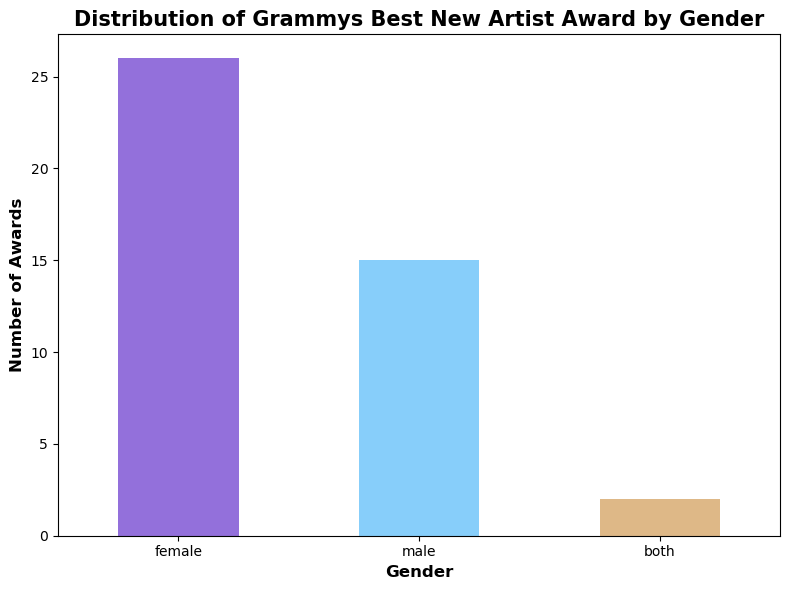

In [110]:
# creating the  bar chart
plt.figure(figsize=(8, 6))

gender_counts.plot(kind='bar', color=['mediumpurple','lightskyblue','burlywood'])

plt.title('Distribution of Grammys Best New Artist Award by Gender', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Gender', fontsize = 12, 
           fontweight='bold')

plt.ylabel('Number of Awards', fontsize = 12, 
           fontweight='bold')

plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()

plt.savefig('gender_distribution.png')
plt.show()

**Note on Visual**

Here we can we that female artists have been awarded with the most Best New Artist award compared to male artists and bands with both genders. I have also displayed the gender_counts dataframe so that we can view the actual counts for each gender group.

Some of the artists who have won these awards are musical groups or duos. Therefore, I also want to visualize the number of music groups vs individual artists who have won this award. 

In [111]:
# counting the number of music groups
group_counts = artist_info_df['music_group'].value_counts()

In [112]:
group_counts

music_group
no     31
yes    12
Name: count, dtype: int64

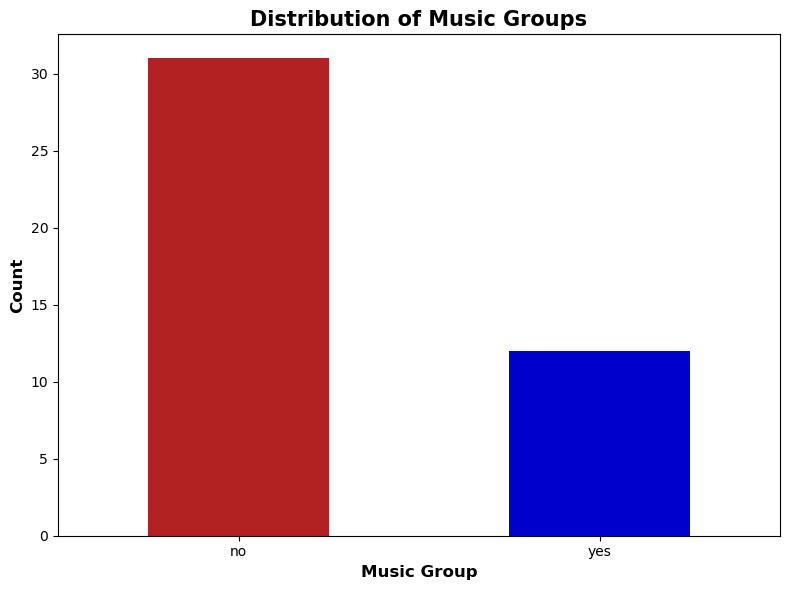

In [113]:
# creating the bar chart
plt.figure(figsize=(8, 6))

group_counts.plot(kind='bar', color=['firebrick', 'mediumblue'])

plt.title('Distribution of Music Groups', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Music Group', 
           fontsize = 12, 
           fontweight = 'bold')

plt.ylabel('Count', 
           fontsize = 12, 
           fontweight = 'bold')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()

plt.savefig('group_distribution.png')

plt.show()

**Note on Visual**

As we can see here, individual artists have received the most Best New Artist Awards compared to music groups. However, we can see that there are quite a handful on musical groups who have won this award, almost half the amount of individual artist. 

Next up, since each artist is associated with several different genres, I want to visualize the most common genre/genre keywords shared by these Best New Artist winners. In order to do this, I will create a word cloud to display the most commen genre keyword present in the artist_genre dataframe.

In [146]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [143]:
new_genre_df

,artist,alternative metal,country,folk,jazz,mellow gold,new jack swing,pop,r&b,rap,rock,soul
0,Cyndi Lauper,0,0,0,0,0,0,1,0,0,0,0
1,Sade,0,0,0,0,0,0,0,0,0,0,1
2,Bruce Hornsby & The Range,0,0,0,0,0,0,0,0,0,1,0
3,Jody Watley,0,0,0,0,0,0,0,1,0,0,0
4,Tracy Chapman,0,0,1,0,0,0,0,0,0,0,0
5,Milli Vanilli,0,0,0,0,0,1,0,0,0,0,0
6,Mariah Carey,0,0,0,0,0,0,1,0,0,0,0
7,Marc Cohn,0,0,0,0,1,0,0,0,0,0,0
8,Arrested Development,0,0,0,0,0,0,0,0,0,0,0
9,Toni Braxton,0,0,0,0,0,0,0,1,0,0,0


In [147]:
from wordcloud import WordCloud

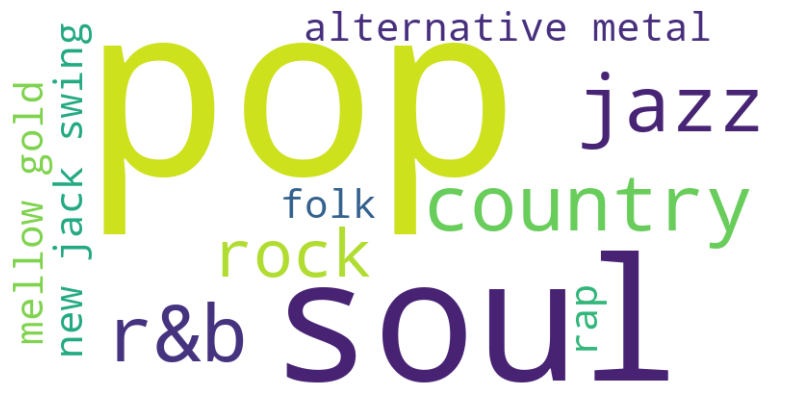

In [148]:
# Drop the 'artist' column since we only want genre columns
genre_df = new_genre_df.drop(columns=['artist'])

# Get the sum of each genre across all rows
genre_frequencies = genre_df.sum().to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(genre_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Notes of Visual**

Here we can see the word cloud of the genre key words, with the most popular words being "pop", "urbancontemporary", "dancepop" , "newwavepop", and "rhymthmblues". Below I made a bar chart to further visualize and compare the genre keyword counts.

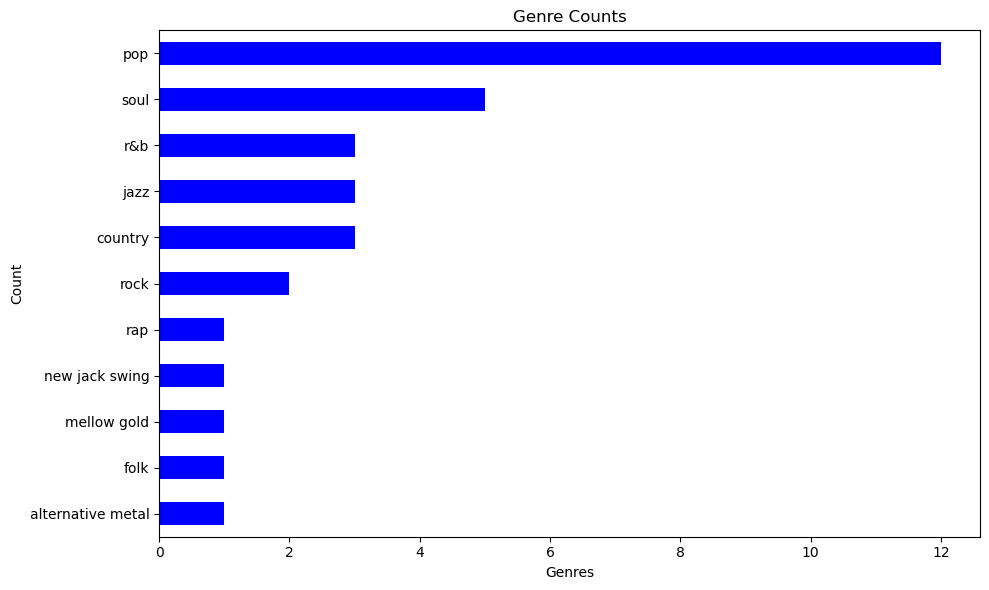

In [156]:
# Get the sum of each genre across all rows
genre_counts = genre_df.sum()

genre_counts = genre_counts.sort_values(ascending = True)

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='blue')
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Does the success of an artist's career decrease after winning this award?

In order to view the timelines of these artists and when they receved this awards and chart singles, I decide to create some x-axis interactive timeline chart using plotly in order to visualize these events in chronlogical order. This will allow us to really view the length of the artist's career. While this may not be a clear cut answer to the success of an artist, it will showcase the longevity of these artists an how active they were post award win.

In [122]:
best_new_df

,award_date,artist
5,1985-02-26,Cyndi Lauper
6,1986-02-25,Sade
7,1987-02-24,Bruce Hornsby & The Range
8,1988-03-02,Jody Watley
9,1989-02-22,Tracy Chapman
10,1990-02-21,Milli Vanilli
11,1991-02-20,Mariah Carey
12,1992-02-25,Marc Cohn
13,1993-02-24,Arrested Development
14,1994-03-01,Toni Braxton


Here I will create the x-axis timeline to display the date of whem each artist won their Grammy Best New Artist Award, and the dates of when they won or were nomiated for VMA or AMA Award.

In [123]:
# Creating a Plotly figure
fig = go.Figure()

# this part will create the info I want to display in the hover text box for each dataset I use

# creating empty list for VMAs
hover_text_vmas = []

# interating through filtered vmas df
for index, row in filtered_vmas_copy.iterrows():
    
    # checking win column for each artist
    outcome = 'Winner' if row['win'] == 'Yes' else 'Nominee'
    
    date = row['date'].strftime("%Y-%m-%d")
    
    # concatenating the information you want to display in the hover text
    text = f"Award Name: {row['award_category']}<br>" \
           f"Date: {date}<br>" \
           f"Outcome: {outcome}"
    
    # appending text to list
    hover_text_vmas.append(text)

# creating empty list for AMAs    
hover_text_amas = []
for index, row in filtered_amas_copy.iterrows():
    
    # checking win column for each artist
    outcome = 'Winner' if row['win'] == 'Yes' else 'Nominee'
    
    date = row['date'].strftime("%Y-%m-%d")
    
    # concatenating the information you want to display in the hover text
    text = f"Award Name: {row['award_name']}<br>" \
           f"Date: {date}<br>" \
           f"Outcome: {outcome}"
    
    # appending text to list
    hover_text_amas.append(text)    

# creating empty list for Best New Artist win
hover_text_best = []
for index, row in best_new_df.iterrows():
    
    date = row['award_date'].strftime("%Y-%m-%d")
    
    # no need to check wins, as these winners already did win the award
    text = f"Best New Artist: {row['artist']}<br>" \
           f"Date: {date}<br>" 
    
    # appending text to list
    hover_text_best.append(text)        
    

# creating the timeline 

# scatter markers for Best New Artist Win
fig.add_trace(go.Scatter(x = best_new_df['award_date'], 
                         y = best_new_df['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 2,
                                                color = 'black'),
                                     symbol = 'star', 
                                     size = 20, 
                                     color = 'gold'),
                         name ='Best New Artist Win', 
                         hoverinfo ='text',
                         text = hover_text_best))


# scatter markers for VMA awards
fig.add_trace(go.Scatter(x = filtered_vmas_copy['date'], 
                         y = filtered_vmas_copy['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 1),
                                     symbol = 'circle', 
                                     size = 10, 
                                     color = 'darkorange'),
                         opacity = 0.9,
                         name = 'VMA Win or Nomination', 
                         hoverinfo = 'text',
                         text = hover_text_vmas))

# scatter markers for AMA awards
fig.add_trace(go.Scatter(x = filtered_amas_copy['date'],
                         y = filtered_amas_copy['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 1),
                                     symbol = 'circle', 
                                     size = 12, 
                                     color = 'limegreen'),
                         opacity = 0.9,
                         name = 'AMA Win or Nomination', 
                         hoverinfo = 'text',
                         text = hover_text_amas))

fig.update_layout(plot_bgcolor = 'lightgray',
                  title = 'Awards Received by Artists',
                  title_font = dict(size = 45, family = 'Arial, sans serif'),
                  xaxis = dict(title='Date', 
                             title_font = dict(size = 35, family = 'Helvetica, sans-serif'),
                             tickfont = dict(size = 12)),
                  yaxis = dict(title ='Artist',
                             title_font = dict(size = 25, family = 'Helvetica, sans-serif'), 
                             tickfont = dict(size =10), 
                             autorange ="reversed"), 
                  legend = dict(font = dict(size = 15))
                 )

# Show the interactive plot
py.plot(fig, filename='vma_ama_timeline.html')

'vma_ama_timeline.html'

Here I am creating the same time line, but to display when each artist won teh Grammy's Best New Artist Award and when they had songs charting on Billboard Hot 100s chart 

In [124]:
fig = go.Figure()

hover_text_best = []
for index, row in best_new_df.iterrows():
    
    date = row['award_date'].strftime("%Y-%m-%d")
    
    # no need to check wins, as these winners already did win the award
    text = f"Best New Artist: {row['artist']}<br>" \
           f"Date: {date}<br>" 
    
    # appending text to list
    hover_text_best.append(text)  

# scatter markers for Best New Artist Win
fig.add_trace(go.Scatter(x = best_new_df['award_date'], y = best_new_df['artist'],
                         mode = 'markers', marker = dict(line = dict(width = 2,
                                                                 color = 'black'),
                                                     symbol = 'star', 
                                                     size = 20, 
                                                     color = 'gold'),
                         name = 'Best New Artist Win', 
                         hoverinfo = 'text',
                         text = hover_text_best))


hover_text_hot100 = []
for index, row in filtered_hot100_copy.iterrows():
    
    date = row['chart_week'].strftime("%Y-%m-%d")
    
    # no need to check wins, as these winners already did win the award
    text = f"Artist Name: {row['artist']}<br>" \
           f"Billboard Hot 100s Chart Week: {date}<br>" 
    
    # appending text to list
    hover_text_hot100.append(text)  
    
# scatter markers for hot 100s df
fig.add_trace(go.Scatter(x = filtered_hot100_copy['chart_week'], 
                         y = filtered_hot100_copy['artist'],
                         mode ='markers', 
                         opacity = 0.7,
                         marker = dict(symbol = 'circle', 
                                     size = 10, 
                                     color = 'purple'),
                         name = 'Charted Song',
                         hoverinfo = 'text',
                         text = hover_text_hot100))

fig.update_layout(plot_bgcolor = 'lightgray',
                  title = 'Billboard Hot 100s Charted Songs',
                  title_font = dict(size = 45),
                  xaxis = dict(title = 'Date', 
                               title_font = dict(size = 35, 
                                                 family = 'Helvetica, sans-serif'), 
                               tickfont = dict(size = 12)),
                  yaxis = dict(title = 'Artist',
                               title_font = dict(size = 25, 
                                                 family = 'Helvetica, sans-serif'), 
                               tickfont = dict(size = 10),
                               autorange ="reversed"),
                  legend = dict(font = dict(size = 15))
                 )

# Show the interactive plot
py.plot(fig, filename='hot100s_timeline.html')

'hot100s_timeline.html'

**Notes on Visuals**

First and foremost, both timelines depict similar conclusions which is that not every artist's career was short lived after winning the award. 

Let's first observe the vma_ama timeline:

In this timeline, we are comparing the VMAS and AMAS Award and Nomination activity for each artist after they won the Best New Artist award. This allows me to see if these artists are still being recognized for their art after being named the Best New Artist for their respective year. This timeline gives us a mixed bag; some artists do tend to go dormant after winning the Best New Artist Awards, either not winning or being nominated for any award post-win, or winning a couple of awards right after wining and never again. These artists include: 

- Cyndi Lauper
- Bruce Hornby & The Range 
- Jody Watley 
- Tracy Chapman (one an award a couple yars after but thats it) 
- Milli Vanilli
- Marc Cohn
- Arrested Development 
- Hootie & The Blowfish
- Paula Cole
- Lauryn Hill
- Shelby Lynn
- Norah Jones (similar to Tracy Chapman)
- Amy Winehouse 
- Esperanza Spalding 
- Bon Iver
- fun.
- Macklemore & Ryan Lewis 
- Sam Smith
- Megan Trainor
- Chance The Rapper
- Alessia Cara
- ** Please note, the artists from Dua Lipa on I did not consider as there is not enough data to determine how well they did in regards to award wins after winnign the Best New Artist Award. Though, so far it seems that they is some acitivity going on with these artists. 

The remaining artists have either won consecutive awards in the following years until the early 2020s/present day, or have retirend to the public's eye after being dormant.  

Next let's look at the Billboard Hot 100s Timeline: 

This is my personal favorite timeline. In my opinion, the Billboard Hot 100s is a very good indicator of how well an artist is doing in the music industry. The Hot 100s is a pretty big deal, and many artists do seek to get on the charts and flaunt when they do get on the charts. This chart displays how well a certain song is doing, combining sales, streams, radio play, and online downloads. So being on the chart in general is a big deal In this timeline, we can see a skeleton of how the careers of artists are/were going. 

We can see a lot of artists actually had a long flourishing career post-award win. Mariah Carey for example had a very long, consistent career after winning the Best New Artist Award. She has consecutively appeared on the charts year after year. Similarly Christina Aguilera also had a goo dand successfully run post-award winning, also landing a spot on the charts consistantly. What does this timeline add to my topic? Basically, this timeline shows that not every artist's career suffered post-award win. Many artists were/are still relevant to this day, or have had a generally long career. While there are artist's who did suffer landing on the charts post win (Sade, Paula Cole, Esperanza Spalding, fun.), this may not be the work of the "Best New Artist Curse" as we can clearly see a large handful of the artists continued to have pretty successful careers. 


## Best New Artist Winners - Where Do They Come From?

In this section, out of curiousity I wanted to look at the artist's a little more in depthly. I want to see where most of these winners originate from. 

In [125]:
#pip install geopy
#pip install geolocator
#pip install geocoder

First, using the artist_info dataframe, I want to combine the state/region and birth country together to create one loaction. 

In [126]:
# combining the two columns

artist_info_df['combined_loc'] = artist_info_df['state_region'] + ', ' + artist_info_df['birth_country'].astype(str)

artist_info_df


,artist,state_region,birth_country,gender,music_group,combined_loc
0,Rickie Lee Jones,Illinois,United States of America,female,no,"Illinois, United States of America"
1,Christopher Cross,Texas,United States of America,male,no,"Texas, United States of America"
2,Sheena Easton,Lanarkshire,Scotland,female,no,"Lanarkshire, Scotland"
3,Men At Work,Victoria,Australia,male,yes,"Victoria, Australia"
4,Culture,St. Andrew,Jamaica,male,yes,"St. Andrew, Jamaica"
5,Cyndi Lauper,New York,United States of America,female,no,"New York, United States of America"
6,Sade,Oyo State,Nigeria,female,no,"Oyo State, Nigeria"
7,Bruce Hornsby & The Range,California,United States of America,male,yes,"California, United States of America"
8,Jody Watley,Illinois,United States of America,female,no,"Illinois, United States of America"
9,Tracy Chapman,Ohio,United States of America,female,no,"Ohio, United States of America"


In order to use plotly to map out these locations, I need to find the longitude and latitude of these locations. Below I will be using the geopy library to find the longitude and latitudes of the recently combined locations.

In [127]:
from geopy.geocoders import Nominatim

# creating Nominatim class
geolocator = Nominatim(user_agent="Geopy Library")

# empty lists for coordinates
lat = []
long = []


for location in artist_info_df['combined_loc']:
    # getting each coordinate and adding in to the empty lists
    getloc = geolocator.geocode(location, timeout=None)
    lat.append(getloc.latitude)
    long.append(getloc.longitude)
    
# adding list to the df    
artist_info_df['latitude'] = lat
artist_info_df['longitude'] = long

artist_info_df.head()

,artist,state_region,birth_country,gender,music_group,combined_loc,latitude,longitude
0,Rickie Lee Jones,Illinois,United States of America,female,no,"Illinois, United States of America",40.079661,-89.433729
1,Christopher Cross,Texas,United States of America,male,no,"Texas, United States of America",31.263890,-98.545612
2,Sheena Easton,Lanarkshire,Scotland,female,no,"Lanarkshire, Scotland",55.575297,-3.833333
3,Men At Work,Victoria,Australia,male,yes,"Victoria, Australia",-36.598610,144.678005
4,Culture,St. Andrew,Jamaica,male,yes,"St. Andrew, Jamaica",18.053956,-76.761974


Here I am creating a map to visual where these artist's originated from. 

As when can see fro the map above, most fo the Best New Artist winners are derived from the United States of America, specially th east coast. Europe looks to be the second most popular country where these artist's come from.

I will further prove this observation by creating a bar chart that will display the number of artists in eachc country. 

In [129]:
# grouping the countries and counting the artists from that country

country_count = artist_info_df['birth_country'].value_counts()

country_count_df = pd.DataFrame(country_count)

country_count_df = country_count_df.reset_index()

In [130]:
artist_info_df['birth_country'].unique()

array(['United States of America', 'Scotland', 'Australia', 'Jamaica',
       'Nigeria', 'Germany', 'England', 'Canada'], dtype=object)

There are 8 countries that the Best New Artist's represent

In [131]:
country_count_df

,birth_country,count
0,United States of America,33
1,England,4
2,Scotland,1
3,Australia,1
4,Jamaica,1
5,Nigeria,1
6,Germany,1
7,Canada,1


In [132]:
import plotly.express as px

# creating the bar chart
fig = px.bar(country_count_df, 
             x= 'birth_country',
             y = 'count',
             color='birth_country', 
             title='Best New Artist Grammy Winners by Country', 
             labels={'birth_country': 'Country', 'count': 'Number of Winners'})

# layout
fig.update_layout(xaxis_title='Country', 
                  yaxis_title='Number of Grammy Winners', 
                  legend_title='Country',
                  title_font_size=20)

fig.show()

# Bar Plots

In this part I have created several bar plots representing the counts of the number of Hot100s singles and artist has received, the number of albums released, number of VMAS and AMAS awards received, and the number of RIAA awards they have received. 

### Billboard Singles Count

Let's go ahead and find out how many singles each artist has had on the charts.

In [133]:
#hot100 songs count:

hot100s_count = filtered_hot100_copy['artist'].value_counts()

hot100s_count_df = pd.DataFrame({'num_on_chart':hot100s_count})

hot100s_count_df = hot100s_count_df.reset_index()

hot100s_count_df

,artist,num_on_chart
0,Mariah Carey,833
1,Maroon 5,708
2,Carrie Underwood,630
3,Alicia Keys,442
4,Dua Lipa,431
5,Christina Aguilera,427
6,Adele,360
7,Sam Smith,355
8,Zac Brown Band,350
9,Billie Eilish,331


In [134]:
hot100s_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist        36 non-null     object
 1   num_on_chart  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


Here I created a dataframe with the number of songs each artist has had on the Billboard Hot 100s Chart.

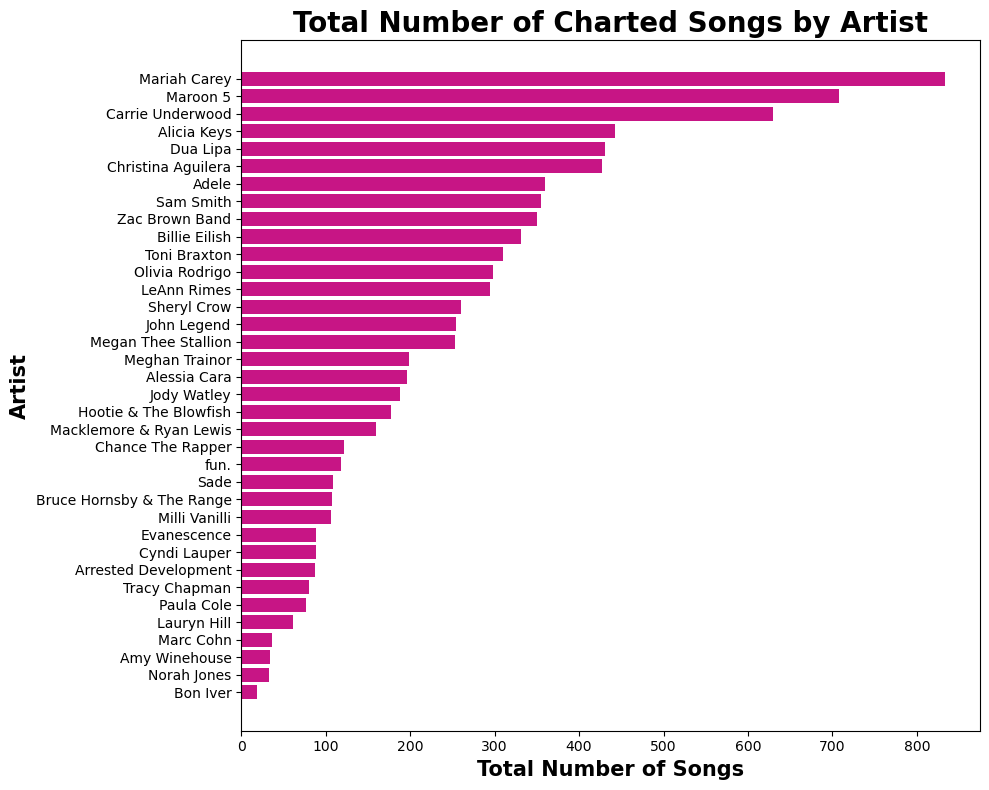

In [135]:
# sorting the hot100s_count in descending order
hot100s_count_sorted = hot100s_count.sort_values(ascending=True)

# Create a horizontal bar chart of the total Hot100s song received by each artist
plt.figure(figsize=(10, 8))
plt.barh(hot100s_count_sorted.index, hot100s_count_sorted, color='mediumvioletred')

plt.title('Total Number of Charted Songs by Artist', 
          fontsize = 20, 
          fontweight = 'bold')

plt.xlabel('Total Number of Songs', 
           fontsize = 15, 
           fontweight = 'bold')

plt.ylabel('Artist', 
           fontsize = 15, 
           fontweight = 'bold')

plt.tight_layout()

plt.savefig('hot100_count.png')
plt.show()


Overall Mariah Carey, Maroon 5, and Carrie Underwood have made the most appearances on the Billboard'd Hot 100s chart. Each of the artist's having at least 600 appearances on the chart in between 1985-2022. It is really interesting to note that the top 10 artists in this bar chart all from a variety of music generations. For example, Mariah Carey emerged 90's, Maroon 5 in the 2000's, Dua Lipa in the late 2010's, Adele in the late 2000's/early 2010's. This indicates that Best New Artists from different eras have been able to sustain successful careers overtime. 

### VMAS Wins And Nominations Count

In this section, I will be counting the number of wins and nominations thse artists have received from the MTV Video Music Awards.

In [136]:
#vmas count:

vmas_count = filtered_vmas_copy.groupby(['artist', 'win']).size().unstack(fill_value = 0)

# updating the column headers to reflect whetehr the artist won or lost
vmas_count.columns = ['vmas_lost', 'vma_win']

vmas_count.reset_index()

vmas_count

,vmas_lost,vma_win
artist,,
Adele,17,3
Alessia Cara,6,2
Alicia Keys,10,4
Amy Winehouse,3,0
Arrested Development,2,2
Billie Eilish,21,6
Carrie Underwood,1,0
Christina Aguilera,21,4
Cyndi Lauper,3,0


Above I create a dataframe with the number of Video Music Award wins and nominations each artist has received.

### AMAS Wins And Nominations Count 

In this section, I will be counting the number of wins and nominations thse artists have received from the Americsn Music Awards. 

In [137]:
amas_count = filtered_amas_copy.groupby(['artist', 'win']).size().unstack(fill_value = 0)

# updating the column headers to reflect whetehr the artist won or lost
amas_count.columns = ['amas_lost', 'amas_win']

amas_count.reset_index()

amas_count

,amas_lost,amas_win
artist,,
Adele,9,5
Alessia Cara,2,0
Alicia Keys,11,5
Arrested Development,5,0
Billie Eilish,6,2
Carrie Underwood,9,17
Christina Aguilera,2,0
Cyndi Lauper,0,2
Dua Lipa,5,2


Above I created a dataframe with the number of American Music Award wins and nominations each artist has received.

### RIAA Awards Count

Below I will count the number of RIAA Awards an artists has received. HOWEVER, I will also be count each type of RIAA award they received, these types include:

- Diamond
- Platinum
- Gold
- Multi-Platinum
- Multi-Diamond

I will be using the dummy_rias_df dataframe, as it already splits each type of award into seperate columns and has information on whether the artist won it or not. 

In [138]:
# reading only the last five columns of the dummy riaa df
last_five_cols = dummy_riaa_df.iloc[:, -5:]

# grouping by artist and adding the values in the last five columns for each artist
riaa_counts = last_five_cols.groupby(dummy_riaa_df['artist']).sum()

riaa_counts

,diamond,gold,multi_diamond,multi_platinum,platinum
artist,,,,,
Adele,3,20,0,54,15
Alessia Cara,0,10,0,10,5
Alicia Keys,0,31,0,37,20
Amy Winehouse,0,3,0,1,3
Arrested Development,0,5,0,3,1
Billie Eilish,1,26,0,15,21
Bon Iver,0,9,0,1,3
Bruce Hornsby & The Range,0,3,0,2,2
Carrie Underwood,0,29,0,35,24


In [139]:
# adding columns with the overall total amount of RIAA awards an artist received
riaa_counts['total'] = riaa_counts.sum(axis=1)

riaa_counts.head()

,diamond,gold,multi_diamond,multi_platinum,platinum,total
artist,,,,,,
Adele,3,20,0,54,15,92
Alessia Cara,0,10,0,10,5,25
Alicia Keys,0,31,0,37,20,88
Amy Winehouse,0,3,0,1,3,7
Arrested Development,0,5,0,3,1,9


Below I will create a bar chart displaying the total RIAA awards these artists received. Thsi will make it easier to visual the riaa_count dataset

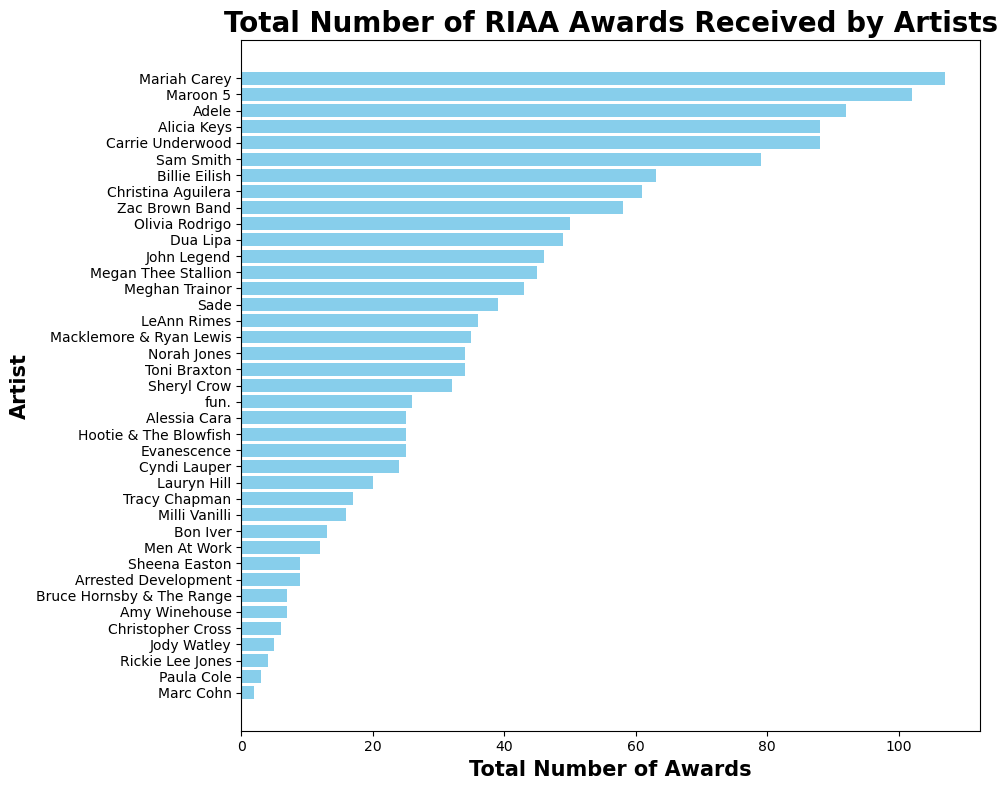

In [140]:
import matplotlib.pyplot as plt

# sorting the riaa_counts in descending order
riaa_counts_sorted = riaa_counts.sort_values(by='total', ascending=True)

# Create a horizontal bar chart of the total awards received by each artist
plt.figure(figsize=(10, 8))
plt.barh(riaa_counts_sorted.index, riaa_counts_sorted['total'], color='skyblue')

plt.title('Total Number of RIAA Awards Received by Artists', 
          fontsize = 20, 
          fontweight = 'bold')

plt.xlabel('Total Number of Awards', 
           fontsize = 15, 
           fontweight = 'bold')

plt.ylabel('Artist', 
           fontsize = 15, 
           fontweight = 'bold')

plt.tight_layout()

plt.savefig('riaa_count.png')
plt.show()


Mariah Carey, Maroon 5, and Adele are the top three artists that received RIAA awards. Similar to the Billboard Hot 100s bar chart analysis, the top 10 artists on this chart are also from differetn music eras, from the 1990's to 2022. 

Now I will create a similar bar chart that also displays the number of each award type these artists have won. 

<Figure size 2000x1500 with 0 Axes>

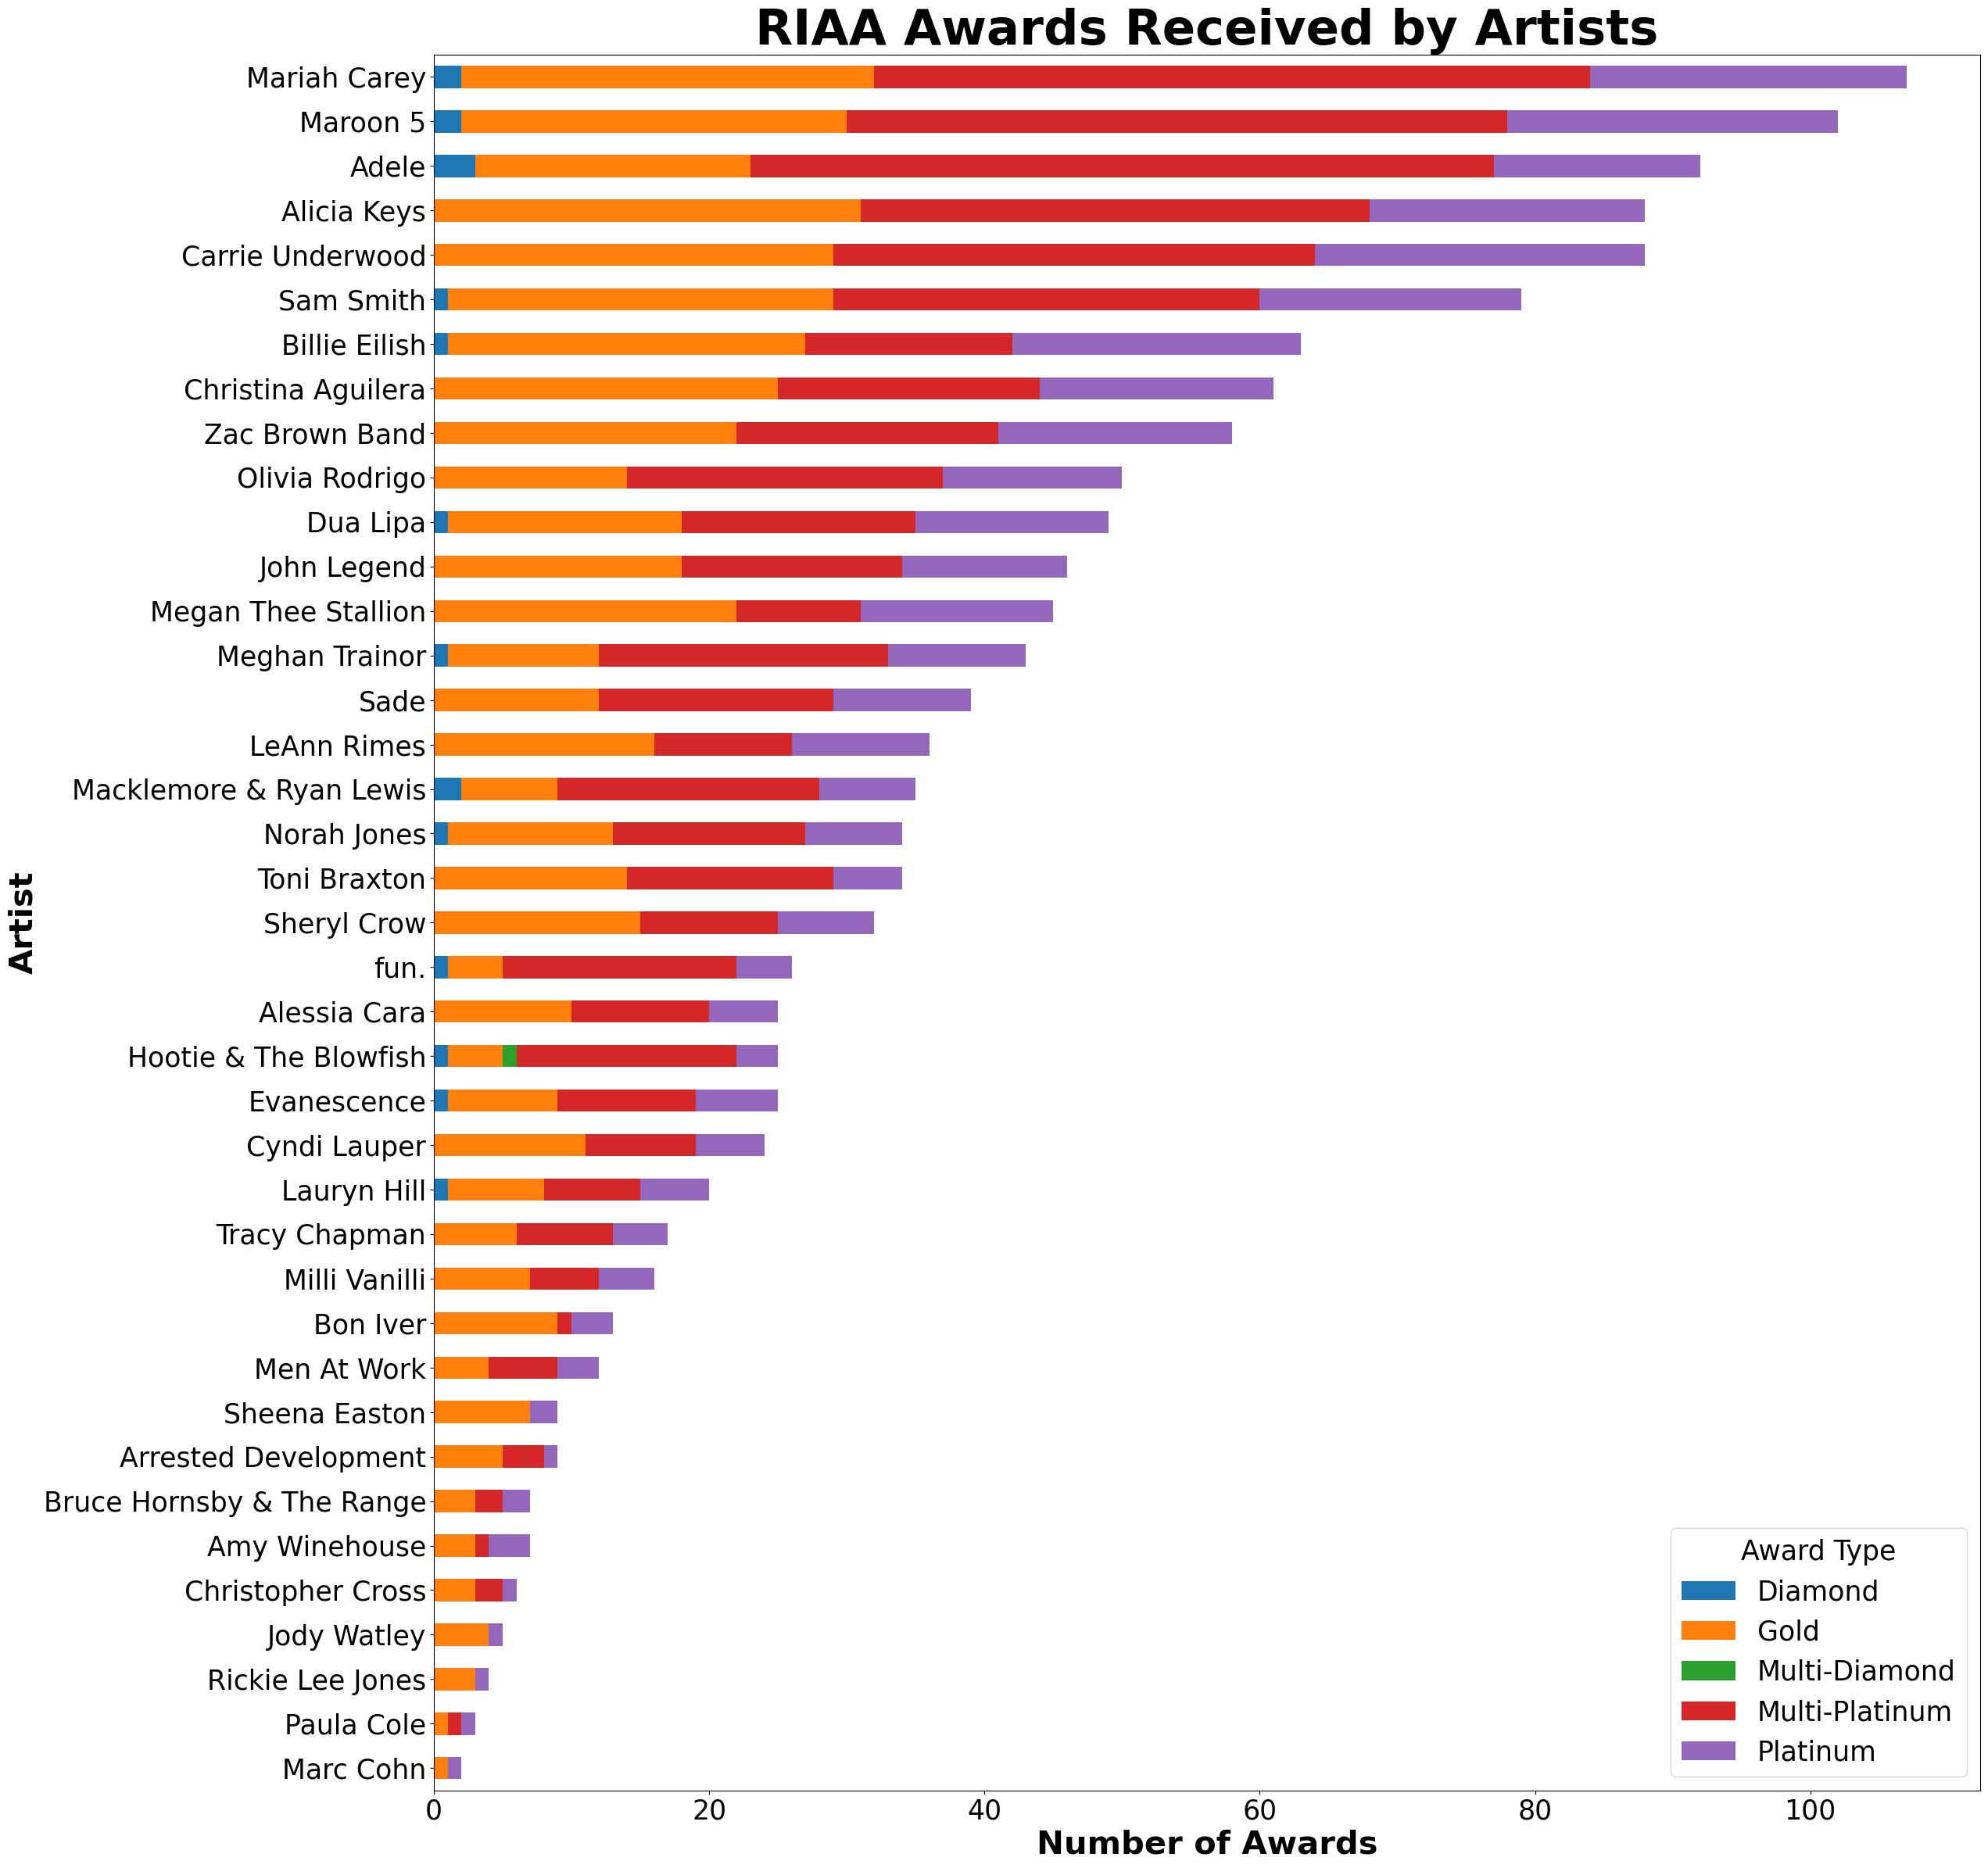

In [141]:
legend_labels = ['Diamond', 'Gold', 'Multi-Diamond', 'Multi-Platinum', 'Platinum']

plt.figure(figsize=(20, 15))
riaa_counts_sorted.drop('total', axis=1).plot(kind='barh', stacked=True)
plt.title('RIAA Awards Received by Artists', fontsize = 45, fontweight = 'bold')
plt.xlabel('Number of Awards', fontsize = 30, fontweight = 'bold')
plt.ylabel('Artist', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize=25)  # Adjust x-axis tick labels font size
plt.yticks(fontsize=25)
plt.legend(legend_labels, title='Award Type', loc='lower right', title_fontsize = 25, fontsize = 25)
plt.subplots_adjust(right=0.5)  # Increase space on the right side for the legend

plt.tight_layout(rect=[6, 5,10, 10])

plt.savefig('riaa_detailed.png', bbox_inches='tight')

plt.show()

## Quantifying Success (check the time range)

Let's try an quantify success

For this project success will be based off the number of Billboard Singles, RIAA Awards, and AMAS/VMAS awards eac artist has received within the five years AFTER the won the Best New Artist award. Therefore, I will not be including the Best New Artists from 2018 - 2022. Each feature will be ranked on a 5-point scale.


Billboard single: If chart position/rank is 
- 1 - 20: 5 points per song
- 21 - 40: 4 points per song
- 41 - 60: 3 points per song
- 61 - 80: 2 points per song
- 81 - 100: 1 point per song 
- featured artist: 1 point per song 

RIAA Awards:
- Multi-Diamond: 5 points
- Diamond: 4 points
- Multi-Platinum: 3 points
- Platinum: 2 points
- Gold: 1 points

AMAS/VMAS Awards:
- Win: 5 points
- Nomination: 2 points



### Billboard Hot 100s Score

In [142]:
filtered_hot100_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8622 entries, 22 to 199389
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           8622 non-null   object        
 1   chart_week       8622 non-null   datetime64[ns]
 2   rank             8622 non-null   int64         
 3   song_title       8622 non-null   object        
 4   main_artist      8622 non-null   object        
 5   featured_artist  8622 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 729.6+ KB


In [143]:
# merging 'filtered_hot100_copy' with 'best_new_df' on the 'artist' column
merged_df = pd.merge(filtered_hot100_copy, best_new_df, on='artist', how='inner')

# filtering the singles within five years after the award date
filtered_df = merged_df[(merged_df['chart_week'] >= merged_df['award_date']) &
                        (merged_df['chart_week'] <= merged_df['award_date'] + pd.DateOffset(years=5))]



In [144]:
filtered_df

,artist,chart_week,rank,song_title,main_artist,featured_artist,award_date
0,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no,2020-01-26
1,Billie Eilish,2024-01-27,20,What Was I Made For?,yes,no,2020-01-26
2,Billie Eilish,2024-01-20,16,What Was I Made For?,yes,no,2020-01-26
3,Billie Eilish,2024-01-13,20,What Was I Made For?,yes,no,2020-01-26
4,Billie Eilish,2023-12-30,49,What Was I Made For?,yes,no,2020-01-26
...,...,...,...,...,...,...,...
8521,Milli Vanilli,1990-03-10,90,Blame It On The Rain,yes,no,1990-02-21
8522,Milli Vanilli,1990-03-03,5,All Or Nothing,yes,no,1990-02-21
8523,Milli Vanilli,1990-03-03,78,Blame It On The Rain,yes,no,1990-02-21
8524,Milli Vanilli,1990-02-24,4,All Or Nothing,yes,no,1990-02-21


In [145]:
billboard_scores_df = pd.DataFrame(columns = ['artist', 'billboard_score'])

# score variable 
score = 0 

for index, row in filtered_df.iterrows():
    
    # this if-else statement represents whether the artist was a main artist or not
    if row['main_artist'] == 'yes':
        
        # these if-else statements represents the chart rank position of the song
        if 1 <= row['rank'] <= 20:
            score += 5
        
        elif 21 <= row['rank'] <= 40:
            score += 4
        
        elif 41 <= row['rank'] <= 60:
            score += 3
        
        elif 61 <= row['rank'] <= 80:
            score += 2
        
        else:
            score += 1
            
    else:
        score += 1
    
    #adding the score to the df
    if row['artist'] in billboard_scores_df['artist'].values:
        
        billboard_scores_df.loc[billboard_scores_df['artist'] == row['artist'], 'billboard_score'] += score
    
    #adding artist in df if they are not already there, adding score too    
    else:
        new_row = pd.DataFrame({'artist': [row['artist']], 'billboard_score': [score]})
        billboard_scores_df = pd.concat([billboard_scores_df, new_row], ignore_index = True)
        
    # resetting score variable
    score = 0   
        
billboard_scores_df        
    

,artist,billboard_score
0,Billie Eilish,546
1,Dua Lipa,1314
2,Olivia Rodrigo,357
3,Mariah Carey,1191
4,Meghan Trainor,192
5,Megan Thee Stallion,207
6,Sam Smith,608
7,Zac Brown Band,514
8,John Legend,111
9,Carrie Underwood,788


In [146]:
# merging wihth the best_new_df to display all the Best New Artists
merged_billboard_scores = pd.merge(best_new_df, billboard_scores_df, on = 'artist', how = 'left')

merged_billboard_scores['billboard_score'] = merged_billboard_scores['billboard_score'].fillna(0)

In [147]:
merged_billboard_scores['billboard_score'] = merged_billboard_scores['billboard_score'].astype('int64')

merged_billboard_scores

,award_date,artist,billboard_score
0,1985-02-26,Cyndi Lauper,276
1,1986-02-25,Sade,118
2,1987-02-24,Bruce Hornsby & The Range,244
3,1988-03-02,Jody Watley,313
4,1989-02-22,Tracy Chapman,4
5,1990-02-21,Milli Vanilli,30
6,1991-02-20,Mariah Carey,1191
7,1992-02-25,Marc Cohn,0
8,1993-02-24,Arrested Development,94
9,1994-03-01,Toni Braxton,734


I am going to remove the artists that won after 2018, since I do not have a full five yeasr of info on these artists

In [148]:
excluded_artists = ['Olivia Rodrigo', 'Megan Thee Stallion', 'Billie Eilish', 'Dua Lipa']

In [149]:
# df without the 2019 and on artists
filter_billboard_scores = merged_billboard_scores[~merged_billboard_scores['artist'].isin(excluded_artists)]

filter_billboard_scores = filter_billboard_scores.reset_index()

filter_billboard_scores = filter_billboard_scores.drop(columns = 'index')

filter_billboard_scores

,award_date,artist,billboard_score
0,1985-02-26,Cyndi Lauper,276
1,1986-02-25,Sade,118
2,1987-02-24,Bruce Hornsby & The Range,244
3,1988-03-02,Jody Watley,313
4,1989-02-22,Tracy Chapman,4
5,1990-02-21,Milli Vanilli,30
6,1991-02-20,Mariah Carey,1191
7,1992-02-25,Marc Cohn,0
8,1993-02-24,Arrested Development,94
9,1994-03-01,Toni Braxton,734


### VMAS//AMAS Score

In [150]:
# merge 'filtered_vmas_copy' with 'best_new_df' on the 'artist' column
merged_vmas = pd.merge(filtered_vmas_copy, best_new_df, on='artist', how='inner')


# filtering the singles within five years after the award date
five_yr_vmas = merged_vmas[(merged_vmas['date'] >= merged_vmas['award_date']) &
                        (merged_vmas['date'] <= merged_vmas['award_date'] + pd.DateOffset(years=5))]

In [151]:
five_yr_vmas

,artist,date,award_category,win,main_artist,featured_artist,award_date
0,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,no,1985-02-26
1,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,no,1985-02-26
2,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,no,1985-02-26
5,Jody Watley,1988-09-07,Best Female Video,No,yes,no,1988-03-02
6,Jody Watley,1988-09-07,Best New Artist in a Video,No,yes,no,1988-03-02
...,...,...,...,...,...,...,...
206,Megan Thee Stallion,2021-09-12,Video of the Year,No,yes,no,2021-03-14
212,Olivia Rodrigo,2022-08-28,Best Editing,No,yes,no,2022-04-03
213,Olivia Rodrigo,2022-08-28,Best Longform Video,No,yes,no,2022-04-03
214,Olivia Rodrigo,2022-08-28,Best Pop,No,yes,no,2022-04-03


In [152]:
five_yr_vmas['featured_artist'].unique()

array(['no'], dtype=object)

No artists are considered features.

In [153]:
# counting the number of wins and losses

vmas_count = five_yr_vmas.groupby(['artist', 'win']).size().unstack(fill_value = 0)

vmas_count.columns = ['vmas_lost', 'vmas_win']

vmas_count.reset_index()

,artist,vmas_lost,vmas_win
0,Adele,5,3
1,Alessia Cara,3,0
2,Alicia Keys,5,2
3,Arrested Development,1,1
4,Billie Eilish,14,3
5,Carrie Underwood,1,0
6,Christina Aguilera,16,2
7,Cyndi Lauper,3,0
8,Dua Lipa,14,1
9,Evanescence,1,0


In [154]:
# merging the count with the best_new_df

counts_vmas_merge = pd.merge(best_new_df, vmas_count, on = 'artist', how = 'left')

counts_vmas_merge['vmas_lost'] = counts_vmas_merge['vmas_lost'].fillna(0).astype('int64')

counts_vmas_merge['vmas_win'] = counts_vmas_merge['vmas_win'].fillna(0).astype('int64')

counts_vmas_merge

,award_date,artist,vmas_lost,vmas_win
0,1985-02-26,Cyndi Lauper,3,0
1,1986-02-25,Sade,0,0
2,1987-02-24,Bruce Hornsby & The Range,0,0
3,1988-03-02,Jody Watley,8,0
4,1989-02-22,Tracy Chapman,1,0
5,1990-02-21,Milli Vanilli,0,0
6,1991-02-20,Mariah Carey,0,0
7,1992-02-25,Marc Cohn,0,0
8,1993-02-24,Arrested Development,1,1
9,1994-03-01,Toni Braxton,4,0


excluding the artists 2019 and on

In [155]:
filter_vmas_five = counts_vmas_merge[~counts_vmas_merge['artist'].isin(excluded_artists)]

filter_vmas_five = filter_vmas_five.reset_index()

filter_vmas_five = filter_vmas_five.drop(columns = 'index')

filter_vmas_five['vmas_lost'] = filter_vmas_five['vmas_lost']

filter_vmas_five['vmas_win'] = filter_vmas_five['vmas_win']


filter_vmas_five

,award_date,artist,vmas_lost,vmas_win
0,1985-02-26,Cyndi Lauper,3,0
1,1986-02-25,Sade,0,0
2,1987-02-24,Bruce Hornsby & The Range,0,0
3,1988-03-02,Jody Watley,8,0
4,1989-02-22,Tracy Chapman,1,0
5,1990-02-21,Milli Vanilli,0,0
6,1991-02-20,Mariah Carey,0,0
7,1992-02-25,Marc Cohn,0,0
8,1993-02-24,Arrested Development,1,1
9,1994-03-01,Toni Braxton,4,0


In [156]:
# finding overall score

vmas_score_list = []

for index, row in filter_vmas_five.iterrows():
    artist_score = (row['vmas_lost'] * 2) + (row['vmas_win'] * 5)
    vmas_score_list.append(artist_score)
    
    
filter_vmas_five['vmas_score'] = vmas_score_list

filter_vmas_five

,award_date,artist,vmas_lost,vmas_win,vmas_score
0,1985-02-26,Cyndi Lauper,3,0,6
1,1986-02-25,Sade,0,0,0
2,1987-02-24,Bruce Hornsby & The Range,0,0,0
3,1988-03-02,Jody Watley,8,0,16
4,1989-02-22,Tracy Chapman,1,0,2
5,1990-02-21,Milli Vanilli,0,0,0
6,1991-02-20,Mariah Carey,0,0,0
7,1992-02-25,Marc Cohn,0,0,0
8,1993-02-24,Arrested Development,1,1,7
9,1994-03-01,Toni Braxton,4,0,8


**AMAS Score**

In [157]:
# Merge 'filtered_amas_copy' with 'best_new_df' on the 'artist' column
merged_amas = pd.merge(filtered_amas_copy, best_new_df, on='artist', how='inner')


# filtering the singles within five years after the award date
five_yr_amas = merged_amas[(merged_amas['date'] >= merged_amas['award_date']) &
                        (merged_amas['date'] <= merged_amas['award_date'] + pd.DateOffset(years=5))]

five_yr_amas

,artist,date,award_name,win,award_date
3,Sade,1989-01-30,Favorite Soul/R&B Female Artist,No,1986-02-25
17,Mariah Carey,1992-01-27,Favorite Dance Song,No,1991-02-20
18,Mariah Carey,1992-01-27,Favorite Pop/Rock Female Artist,No,1991-02-20
19,Mariah Carey,1992-01-27,Favorite Soul/R&B Female Artist,Yes,1991-02-20
20,Mariah Carey,1993-01-25,Favorite Adult Contemporary Album,Yes,1991-02-20
...,...,...,...,...,...
211,Billie Eilish,2020-11-22,Favorite Social Artist,No,2020-01-26
217,Megan Thee Stallion,2021-11-21,Favorite Female Hip-Hop Artist,Yes,2021-03-14
218,Megan Thee Stallion,2021-11-21,Favorite Hip-Hop Album,Yes,2021-03-14
219,Megan Thee Stallion,2021-11-21,Favorite Trending Song,Yes,2021-03-14


In [158]:
# counting wins and losses

amas_count = five_yr_amas.groupby(['artist', 'win']).size().unstack(fill_value = 0)

amas_count.columns = ['amas_lost', 'amas_win']

amas_count.reset_index()

,artist,amas_lost,amas_win
0,Adele,1,4
1,Alicia Keys,1,1
2,Arrested Development,2,0
3,Billie Eilish,2,0
4,Carrie Underwood,3,5
5,Christina Aguilera,2,0
6,Dua Lipa,4,2
7,Evanescence,2,0
8,Lauryn Hill,0,2
9,LeAnn Rimes,4,0


In [159]:
counts_amas_five = pd.merge(best_new_df, amas_count, on = 'artist', how = 'left')

counts_amas_five['amas_lost'] = counts_amas_five['amas_lost'].fillna(0)

counts_amas_five['amas_win'] = counts_amas_five['amas_win'].fillna(0)

counts_amas_five

,award_date,artist,amas_lost,amas_win
0,1985-02-26,Cyndi Lauper,0.0,0.0
1,1986-02-25,Sade,1.0,0.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,0.0
3,1988-03-02,Jody Watley,0.0,0.0
4,1989-02-22,Tracy Chapman,0.0,0.0
5,1990-02-21,Milli Vanilli,0.0,0.0
6,1991-02-20,Mariah Carey,12.0,6.0
7,1992-02-25,Marc Cohn,0.0,0.0
8,1993-02-24,Arrested Development,2.0,0.0
9,1994-03-01,Toni Braxton,3.0,3.0


excluding artists 2019 and on

In [160]:
filter_amas_five = counts_amas_five[~counts_amas_five['artist'].isin(excluded_artists)]

filter_amas_five = filter_amas_five.reset_index()

filter_amas_five = filter_amas_five.drop(columns = 'index')

filter_amas_five['amas_lost'] = filter_amas_five['amas_lost'].astype('int64')

filter_amas_five['amas_win'] = filter_amas_five['amas_win'].astype('int64')


filter_amas_five

,award_date,artist,amas_lost,amas_win
0,1985-02-26,Cyndi Lauper,0,0
1,1986-02-25,Sade,1,0
2,1987-02-24,Bruce Hornsby & The Range,0,0
3,1988-03-02,Jody Watley,0,0
4,1989-02-22,Tracy Chapman,0,0
5,1990-02-21,Milli Vanilli,0,0
6,1991-02-20,Mariah Carey,12,6
7,1992-02-25,Marc Cohn,0,0
8,1993-02-24,Arrested Development,2,0
9,1994-03-01,Toni Braxton,3,3


In [161]:
# totaling up the score

amas_score_list = []

for index, row in filter_amas_five.iterrows():
    artist_score = (row['amas_lost'] * 2) + (row['amas_win'] * 5)
    amas_score_list.append(artist_score)
    
    
filter_amas_five['amas_score'] = amas_score_list

filter_amas_five

,award_date,artist,amas_lost,amas_win,amas_score
0,1985-02-26,Cyndi Lauper,0,0,0
1,1986-02-25,Sade,1,0,2
2,1987-02-24,Bruce Hornsby & The Range,0,0,0
3,1988-03-02,Jody Watley,0,0,0
4,1989-02-22,Tracy Chapman,0,0,0
5,1990-02-21,Milli Vanilli,0,0,0
6,1991-02-20,Mariah Carey,12,6,54
7,1992-02-25,Marc Cohn,0,0,0
8,1993-02-24,Arrested Development,2,0,4
9,1994-03-01,Toni Braxton,3,3,21


### RIAA awards Score

In [162]:
dummy_riaa_df.head()

,artist,title,format,type,award_date,diamond,gold,multi_diamond,multi_platinum,platinum
0,Rickie Lee Jones,Flying Cowboys,Album,Standard,1997-09-18,False,True,False,False,False
1,Rickie Lee Jones,Pirates,Album,Standard,1981-09-30,False,True,False,False,False
2,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-05-22,False,True,False,False,False
3,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-08-07,False,False,False,False,True
4,Christopher Cross,Christopher Cross,Album,Standard,1980-08-17,False,False,False,True,False


In [163]:
# Merge 'dummy_riaa_df' with 'best_new_df' on the 'artist' column
merged_riaa = pd.merge(dummy_riaa_df, best_new_df, on='artist', how='inner', suffixes = ('_riaa', '_bestnew'))


# Filter the singles within five years after the award date
five_yr_riaa = merged_riaa[(merged_riaa['award_date_riaa'] >= merged_riaa['award_date_bestnew']) &
                        (merged_riaa['award_date_riaa'] <= merged_riaa['award_date_bestnew'] + pd.DateOffset(years=5))]



In [164]:
# reading the last five columns of the dummy riaa df
last_five_cols = dummy_riaa_df.iloc[:, -5:]

# grouping by artist and adding the values in the last five columns for each artist
riaa_counts = last_five_cols.groupby(five_yr_riaa['artist']).sum()

riaa_counts

,diamond,gold,multi_diamond,multi_platinum,platinum
artist,,,,,
Adele,2,8,0,36,9
Alessia Cara,0,2,0,5,3
Alicia Keys,0,2,0,6,3
Amy Winehouse,0,2,0,0,0
Arrested Development,0,2,0,0,2
Billie Eilish,1,10,0,10,8
Bon Iver,0,2,0,0,1
Bruce Hornsby & The Range,0,2,0,1,2
Carrie Underwood,0,6,0,8,5


In [165]:
counts_riaa_five = pd.merge(best_new_df, riaa_counts, on = 'artist', how = 'left')

counts_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0.0,2.0,0.0,2.0,1.0
1,1986-02-25,Sade,0.0,3.0,0.0,0.0,1.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,2.0,0.0,1.0,2.0
3,1988-03-02,Jody Watley,0.0,0.0,0.0,2.0,1.0
4,1989-02-22,Tracy Chapman,0.0,1.0,0.0,1.0,1.0
5,1990-02-21,Milli Vanilli,0.0,1.0,0.0,0.0,0.0
6,1991-02-20,Mariah Carey,0.0,7.0,0.0,6.0,4.0
7,1992-02-25,Marc Cohn,0.0,0.0,0.0,0.0,1.0
8,1993-02-24,Arrested Development,0.0,2.0,0.0,0.0,2.0
9,1994-03-01,Toni Braxton,0.0,14.0,0.0,1.0,5.0


In [166]:
columns = ['diamond', 'gold', 'multi_diamond', 'multi_platinum', 'platinum']

counts_riaa_five[columns] = counts_riaa_five[columns].fillna(0)

counts_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0.0,2.0,0.0,2.0,1.0
1,1986-02-25,Sade,0.0,3.0,0.0,0.0,1.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,2.0,0.0,1.0,2.0
3,1988-03-02,Jody Watley,0.0,0.0,0.0,2.0,1.0
4,1989-02-22,Tracy Chapman,0.0,1.0,0.0,1.0,1.0
5,1990-02-21,Milli Vanilli,0.0,1.0,0.0,0.0,0.0
6,1991-02-20,Mariah Carey,0.0,7.0,0.0,6.0,4.0
7,1992-02-25,Marc Cohn,0.0,0.0,0.0,0.0,1.0
8,1993-02-24,Arrested Development,0.0,2.0,0.0,0.0,2.0
9,1994-03-01,Toni Braxton,0.0,14.0,0.0,1.0,5.0


In [167]:
counts_riaa_five[columns] = counts_riaa_five[columns].astype('int64')

counts_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0,2,0,2,1
1,1986-02-25,Sade,0,3,0,0,1
2,1987-02-24,Bruce Hornsby & The Range,0,2,0,1,2
3,1988-03-02,Jody Watley,0,0,0,2,1
4,1989-02-22,Tracy Chapman,0,1,0,1,1
5,1990-02-21,Milli Vanilli,0,1,0,0,0
6,1991-02-20,Mariah Carey,0,7,0,6,4
7,1992-02-25,Marc Cohn,0,0,0,0,1
8,1993-02-24,Arrested Development,0,2,0,0,2
9,1994-03-01,Toni Braxton,0,14,0,1,5


In [168]:
filter_riaa_five = counts_riaa_five[~counts_riaa_five['artist'].isin(excluded_artists)]

filter_riaa_five = filter_riaa_five.reset_index()

filter_riaa_five = filter_riaa_five.drop(columns = 'index')

filter_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0,2,0,2,1
1,1986-02-25,Sade,0,3,0,0,1
2,1987-02-24,Bruce Hornsby & The Range,0,2,0,1,2
3,1988-03-02,Jody Watley,0,0,0,2,1
4,1989-02-22,Tracy Chapman,0,1,0,1,1
5,1990-02-21,Milli Vanilli,0,1,0,0,0
6,1991-02-20,Mariah Carey,0,7,0,6,4
7,1992-02-25,Marc Cohn,0,0,0,0,1
8,1993-02-24,Arrested Development,0,2,0,0,2
9,1994-03-01,Toni Braxton,0,14,0,1,5


In [169]:
# totaling the RIAA total score
riaa_score_list = []

for index, row in filter_riaa_five.iterrows():
    artist_score = (row['diamond'] * 4) + (row['gold'] * 1) + (row['multi_diamond'] * 5) + (row['multi_platinum'] * 3) + (row['platinum'] * 2)
    riaa_score_list.append(artist_score)
    
    
filter_riaa_five['riaa_score'] = riaa_score_list

filter_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum,riaa_score
0,1985-02-26,Cyndi Lauper,0,2,0,2,1,10
1,1986-02-25,Sade,0,3,0,0,1,5
2,1987-02-24,Bruce Hornsby & The Range,0,2,0,1,2,9
3,1988-03-02,Jody Watley,0,0,0,2,1,8
4,1989-02-22,Tracy Chapman,0,1,0,1,1,6
5,1990-02-21,Milli Vanilli,0,1,0,0,0,1
6,1991-02-20,Mariah Carey,0,7,0,6,4,33
7,1992-02-25,Marc Cohn,0,0,0,0,1,2
8,1993-02-24,Arrested Development,0,2,0,0,2,6
9,1994-03-01,Toni Braxton,0,14,0,1,5,27


Below I will be combining all of the count dataframes into one dataframe.

In [170]:
# merging and creating score df


merge_1 = pd.merge(filter_vmas_five, filter_amas_five, on = 'artist')

merge_1 = merge_1.drop(columns = ['award_date_x', 
                                  'vmas_lost', 
                                  'vmas_win', 
                                  'award_date_y', 
                                  'amas_lost', 
                                  'amas_win'])

merge_1

,artist,vmas_score,amas_score
0,Cyndi Lauper,6,0
1,Sade,0,2
2,Bruce Hornsby & The Range,0,0
3,Jody Watley,16,0
4,Tracy Chapman,2,0
5,Milli Vanilli,0,0
6,Mariah Carey,0,54
7,Marc Cohn,0,0
8,Arrested Development,7,4
9,Toni Braxton,8,21


In [171]:
merge_2 = pd.merge(merge_1, filter_riaa_five, on = 'artist')

merge_2 = merge_2.drop(columns = ['award_date', 
                                        'diamond', 
                                        'gold', 
                                        'multi_diamond', 
                                        'multi_platinum', 
                                        'platinum'])

merge_2

,artist,vmas_score,amas_score,riaa_score
0,Cyndi Lauper,6,0,10
1,Sade,0,2,5
2,Bruce Hornsby & The Range,0,0,9
3,Jody Watley,16,0,8
4,Tracy Chapman,2,0,6
5,Milli Vanilli,0,0,1
6,Mariah Carey,0,54,33
7,Marc Cohn,0,0,2
8,Arrested Development,7,4,6
9,Toni Braxton,8,21,27


In [172]:
all_scores = pd.merge(merge_2, filter_billboard_scores, on = 'artist')

all_scores = all_scores.drop(columns = 'award_date')

all_scores

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,6,0,10,276
1,Sade,0,2,5,118
2,Bruce Hornsby & The Range,0,0,9,244
3,Jody Watley,16,0,8,313
4,Tracy Chapman,2,0,6,4
5,Milli Vanilli,0,0,1,30
6,Mariah Carey,0,54,33,1191
7,Marc Cohn,0,0,2,0
8,Arrested Development,7,4,6,94
9,Toni Braxton,8,21,27,734


# From here on I am stuck

From my understand, since all four columns are based off the same scale (5-point scale), there is no need for me to standardize it. 

In [173]:
all_scores.describe()

,vmas_score,amas_score,riaa_score,billboard_score
count,34.000000,34.000000,34.000000,34.000000
mean,5.058824,5.735294,22.029412,287.911765
std,9.816317,11.233901,27.452974,308.089555
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.250000,48.000000
50%,0.000000,0.000000,15.000000,160.500000
75%,5.500000,5.500000,29.250000,486.500000
max,42.000000,54.000000,142.000000,1191.000000


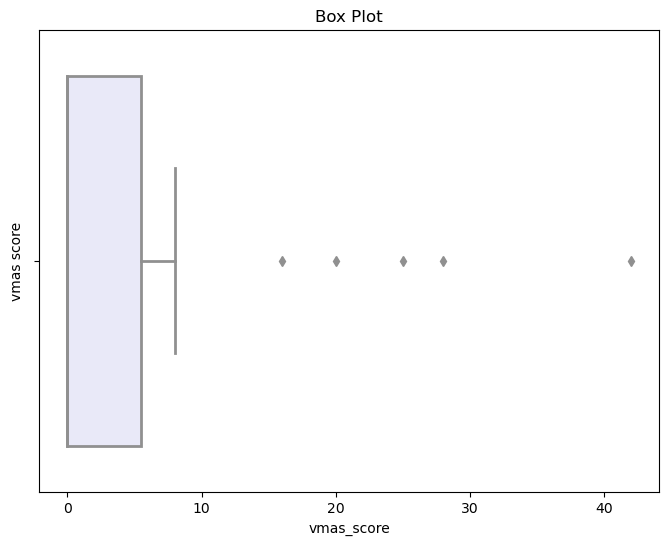

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_scores, x='vmas_score', orient='h', linewidth=2, color='lavender')
plt.title("Box Plot")
plt.ylabel('vmas score')
plt.show()

YIKES the mean and std are ery out of whack and WAY above 0 and 1. This calls for some normalization!

In [175]:
all_scores_2 = all_scores

all_scores_2

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,6,0,10,276
1,Sade,0,2,5,118
2,Bruce Hornsby & The Range,0,0,9,244
3,Jody Watley,16,0,8,313
4,Tracy Chapman,2,0,6,4
5,Milli Vanilli,0,0,1,30
6,Mariah Carey,0,54,33,1191
7,Marc Cohn,0,0,2,0
8,Arrested Development,7,4,6,94
9,Toni Braxton,8,21,27,734


In [176]:
all_scores_2

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,6,0,10,276
1,Sade,0,2,5,118
2,Bruce Hornsby & The Range,0,0,9,244
3,Jody Watley,16,0,8,313
4,Tracy Chapman,2,0,6,4
5,Milli Vanilli,0,0,1,30
6,Mariah Carey,0,54,33,1191
7,Marc Cohn,0,0,2,0
8,Arrested Development,7,4,6,94
9,Toni Braxton,8,21,27,734


Performing Min-Max Normalization 

x = ((x-min(x))/max(x) - min(x))


vmas_score:
- min = 0
- max = 42

In [177]:
#finding min and max of vmas_score

vmas_min = all_scores_2['vmas_score'].min()

vmas_max = all_scores_2['vmas_score'].max()

vmas_max

42

In [178]:

all_scores_scaled = all_scores_2

In [179]:
#Normalizing the vmas column


all_scores_scaled['vmas_score'] = (all_scores_scaled['vmas_score'] - vmas_min)/(vmas_max - vmas_min)


In [180]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0,10,276
1,Sade,0.000000,2,5,118
2,Bruce Hornsby & The Range,0.000000,0,9,244
3,Jody Watley,0.380952,0,8,313
4,Tracy Chapman,0.047619,0,6,4
5,Milli Vanilli,0.000000,0,1,30
6,Mariah Carey,0.000000,54,33,1191
7,Marc Cohn,0.000000,0,2,0
8,Arrested Development,0.166667,4,6,94
9,Toni Braxton,0.190476,21,27,734


In [181]:
# min and max of amas

amas_min = all_scores_2['amas_score'].min()

amas_max = all_scores_2['amas_score'].max()


In [182]:
# Normalizing the amas column

all_scores_scaled['amas_score'] = (all_scores_scaled['amas_score'] - amas_min)/(amas_max - amas_min)


In [183]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,10,276
1,Sade,0.000000,0.037037,5,118
2,Bruce Hornsby & The Range,0.000000,0.000000,9,244
3,Jody Watley,0.380952,0.000000,8,313
4,Tracy Chapman,0.047619,0.000000,6,4
5,Milli Vanilli,0.000000,0.000000,1,30
6,Mariah Carey,0.000000,1.000000,33,1191
7,Marc Cohn,0.000000,0.000000,2,0
8,Arrested Development,0.166667,0.074074,6,94
9,Toni Braxton,0.190476,0.388889,27,734


In [184]:
# min and max of riaa

riaa_min = all_scores_2['riaa_score'].min()

riaa_max = all_scores_2['riaa_score'].max()


In [185]:
# Normalizing the riaa column

all_scores_scaled['riaa_score'] = (all_scores_scaled['riaa_score'] - riaa_min)/(riaa_max - riaa_min)


In [186]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,276
1,Sade,0.000000,0.037037,0.035211,118
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,244
3,Jody Watley,0.380952,0.000000,0.056338,313
4,Tracy Chapman,0.047619,0.000000,0.042254,4
5,Milli Vanilli,0.000000,0.000000,0.007042,30
6,Mariah Carey,0.000000,1.000000,0.232394,1191
7,Marc Cohn,0.000000,0.000000,0.014085,0
8,Arrested Development,0.166667,0.074074,0.042254,94
9,Toni Braxton,0.190476,0.388889,0.190141,734


In [187]:
# min and max of billboard

billboard_min = all_scores_2['billboard_score'].min()

billboard_max = all_scores_2['billboard_score'].max()


In [188]:
# Normalizing the billboard column

all_scores_scaled['billboard_score'] = (all_scores_scaled['billboard_score'] - billboard_min)/(billboard_max - billboard_min)


In [189]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,0.231738
1,Sade,0.000000,0.037037,0.035211,0.099076
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,0.204870
3,Jody Watley,0.380952,0.000000,0.056338,0.262804
4,Tracy Chapman,0.047619,0.000000,0.042254,0.003359
5,Milli Vanilli,0.000000,0.000000,0.007042,0.025189
6,Mariah Carey,0.000000,1.000000,0.232394,1.000000
7,Marc Cohn,0.000000,0.000000,0.014085,0.000000
8,Arrested Development,0.166667,0.074074,0.042254,0.078925
9,Toni Braxton,0.190476,0.388889,0.190141,0.616289


In [190]:
all_scores_scaled['total_score'] = all_scores_scaled['vmas_score'] + all_scores_scaled['amas_score'] + all_scores_scaled['riaa_score'] + all_scores_scaled['billboard_score']



In [191]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score,total_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,0.231738,0.445018
1,Sade,0.000000,0.037037,0.035211,0.099076,0.171325
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,0.204870,0.268250
3,Jody Watley,0.380952,0.000000,0.056338,0.262804,0.700095
4,Tracy Chapman,0.047619,0.000000,0.042254,0.003359,0.093231
5,Milli Vanilli,0.000000,0.000000,0.007042,0.025189,0.032231
6,Mariah Carey,0.000000,1.000000,0.232394,1.000000,2.232394
7,Marc Cohn,0.000000,0.000000,0.014085,0.000000,0.014085
8,Arrested Development,0.166667,0.074074,0.042254,0.078925,0.361920
9,Toni Braxton,0.190476,0.388889,0.190141,0.616289,1.385795


In [192]:
# min and max of total score

total_min = all_scores_scaled['total_score'].min()

total_max = all_scores_scaled['total_score'].max()


In [193]:
# Normalizing the total score column

all_scores_scaled['total_score'] = (all_scores_scaled['total_score'] - total_min)/(total_max - total_min)


In [194]:
all_scores_scaled

,artist,vmas_score,amas_score,riaa_score,billboard_score,total_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,0.231738,0.169434
1,Sade,0.000000,0.037037,0.035211,0.099076,0.065230
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,0.204870,0.102133
3,Jody Watley,0.380952,0.000000,0.056338,0.262804,0.266551
4,Tracy Chapman,0.047619,0.000000,0.042254,0.003359,0.035496
5,Milli Vanilli,0.000000,0.000000,0.007042,0.025189,0.012272
6,Mariah Carey,0.000000,1.000000,0.232394,1.000000,0.849953
7,Marc Cohn,0.000000,0.000000,0.014085,0.000000,0.005362
8,Arrested Development,0.166667,0.074074,0.042254,0.078925,0.137796
9,Toni Braxton,0.190476,0.388889,0.190141,0.616289,0.527622


# Modeling Section

Add explanation...

In [270]:
# predictors
x = modeling_df_enc.drop(columns = ["success_score", "music_group_yes", "gender_both", "music_group_no", 'new_jack_swing', 'mellow_gold', 'folk'],axis=1)

# target variable
y = modeling_df_enc['success_score']

In [271]:
# standarizing the predictor values
sc = StandardScaler()
X = sc.fit_transform(x)

In [272]:
#70/30 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size=0.30)

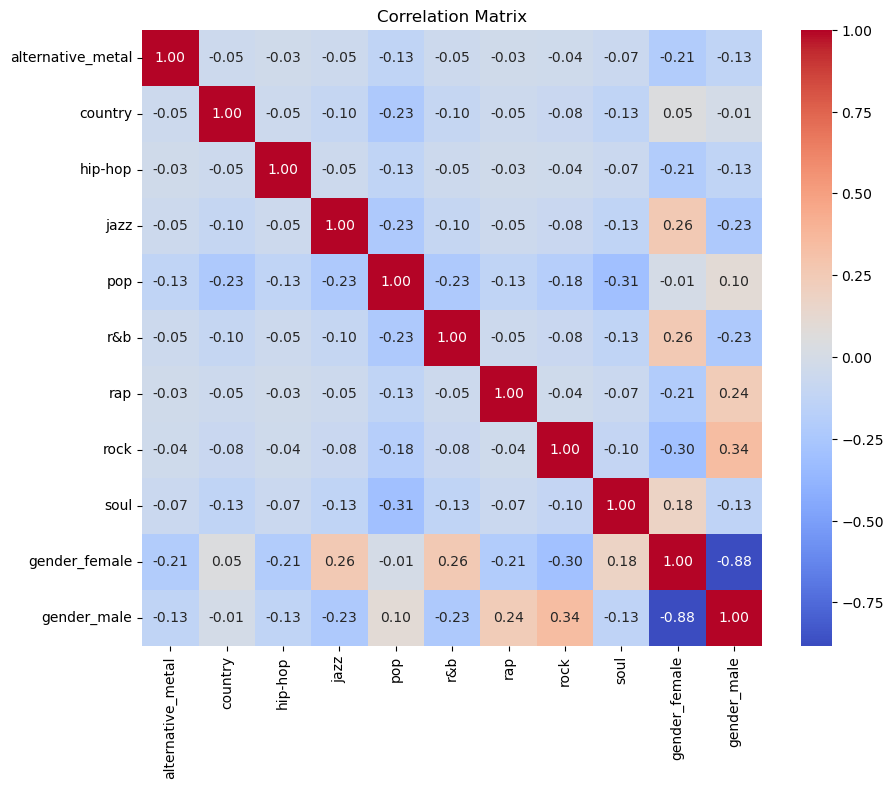

In [273]:
# Creating Correlation Matrix to check for multicollinearity

correlation_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [274]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vals = pd.DataFrame()
vif_vals['Variable'] = x.columns
vif_vals['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_vals[vif_vals['VIF'] > 10]



,Variable,VIF


All of my variable were found to be highly corrleated, however, I decided to keep them for my research as i needed to keep ....

EXPLAIN EVERTHING I DID

*Interpret Here*

- Multicollinearity seems to be present between the gender_male, gender_female, music_group_no, music_group_yes predictors, as these relationships have the highest negative correlation . Similarily, gender_both, alternative_metal, and hip-hop also have a very high positive correlation (0.70)

- these predictor variables may affect the stability and reliabillity of the regression coeffiencts that will be estimated in the below models. 

Because my end goal is to predict the success score of an artist after winning the Best New Artist award, dropping predictors would not be a desirable approach as all of the features may be relevant to predicitng their success scores. Instead, I will go ahead and crete several regression models (Linear, Lasso, Ridge, SVR, and Decision Tree Regressor) and compare their performances to each other. 

## Linear Model

In [275]:
# creating linear regression model
linear_model = LinearRegression()

# fitting the model
linear_model.fit(X_train, y_train)
linear_model

# predicting 
y_pred = linear_model.predict(X_test)
y_pred

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------')
print(f'Linear Regression:' )
print('--------------------------')
print("Mean Squared Error (MSE) - Linear:", mse)
print("Mean Absolute Error (MAE) - Linear:", mae)      
print("R-squared (R2) - Linear:", r2)

--------------------------
Linear Regression:
--------------------------
Mean Squared Error (MSE) - Linear: 0.084366934682033
Mean Absolute Error (MAE) - Linear: 0.19780198502554527
R-squared (R2) - Linear: 0.13809841123359823


## Evaluating the Linear Regression Model's Performace

### Cross Validating the Linear Regression Model 

In [276]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive since scikit-learn returns negative MSE
cv_scores = -cv_scores

print('------------------------------------------------')
print(f'Linear Regression Cross Validation Scores :' )
print('------------------------------------------------')
print("Linear Regression - Cross-Validation MSE Scores:", cv_scores)
print("Linear Regression - Mean Cross-Validation MSE:", cv_scores.mean())

------------------------------------------------
Linear Regression Cross Validation Scores :
------------------------------------------------
Linear Regression - Cross-Validation MSE Scores: [0.0751079  0.03450348 0.03829398 0.09553012 0.03228062]
Linear Regression - Mean Cross-Validation MSE: 0.05514322289312882


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.101. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.247.

R^2: This metric explains the proportion of variance in the target variable explained by the model. In this casse, since the R^2 score is negative, meaning that the model does not capture the variance inthe target variable well. It performs poorly when explaining the variability of the success scores. 

Cross Validated MSE Scores: One of the folds has an unusually high score compared to the other four scores.

Cross Validated Mean MSE Scores: It is very high (which is probably due to the outilier in the first cross validation MSE score). This high mean indicates that the models perfromance varies across different folds. This is most likely due to the small size of the dataset being used. 

## Lasso Regression Model 

In [277]:
# testing different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alphas: 
    
    # creating Lasso regression model
    lasso_model = Lasso(alpha = i)  

    # fitting the model
    lasso_model.fit(X_train, y_train)
    
    # predicting
    y_pred_lasso = lasso_model.predict(X_test)
    
    # calculating evaluation metrics
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    print('---------------------------------')
    print(f'Lasso Regression - Alpha = {i}:' )
    print('---------------------------------')
    print("Mean Squared Error (MSE) - Lasso:", mse_lasso)
    print("Mean Absolute Error (MAE) - Lasso:", mae_lasso)      
    print("R-squared (R2) - Lasso:", r2_lasso)

---------------------------------
Lasso Regression - Alpha = 0.001:
---------------------------------
Mean Squared Error (MSE) - Lasso: 0.08416639736432933
Mean Absolute Error (MAE) - Lasso: 0.19397363446077973
R-squared (R2) - Lasso: 0.14014712182604971
---------------------------------
Lasso Regression - Alpha = 0.01:
---------------------------------
Mean Squared Error (MSE) - Lasso: 0.08789335635812037
Mean Absolute Error (MAE) - Lasso: 0.183535489864624
R-squared (R2) - Lasso: 0.10207211186957421
---------------------------------
Lasso Regression - Alpha = 0.1:
---------------------------------
Mean Squared Error (MSE) - Lasso: 0.10515816740307807
Mean Absolute Error (MAE) - Lasso: 0.24554627717222513
R-squared (R2) - Lasso: -0.07430703625858182
---------------------------------
Lasso Regression - Alpha = 1:
---------------------------------
Mean Squared Error (MSE) - Lasso: 0.10515816740307807
Mean Absolute Error (MAE) - Lasso: 0.24554627717222513
R-squared (R2) - Lasso: -0.07430

**Explaining this models performance**

First and foremost, let's look at the overall performances of each alpha value. The scores slighty change when comparing the alpha value of 0.001 and 0.01. However, the scores of the Lasso model with rest of the alpha values are all exactly the same (most likely due to the small dataset being used). Between 0.001 and 0.01 alpha values, the 0.01 does perform slighty better especially since its R^2 value is a postive score rather than negative score. Below are some more observations made in regards to the Lasso Regression Model where alpha = 0.01:

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.086. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.210.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.124. In this case, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores. 



## Ridge Regression Model

In [278]:
# testing different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alphas:
    
    # creating the ridge model
    ridge_model = Ridge(alpha = i)
    
    # fitting the model
    ridge_model.fit(X_train, y_train)
    
    # predicting 
    y_pred_ridge = ridge_model.predict(X_test)
    
    # calculating evaluation metrics
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test,y_pred_ridge)
    
    print('---------------------------------')
    print(f'Ridge Regression - Alpha = {i}:' )
    print('---------------------------------')
    print("Mean Squared Error (MSE) - Ridge:", mse_ridge)
    print("Mean Absolute Error (MAE) - Ridge:", mae_ridge)      
    print("R-squared (R2) - Ridge:", r2_ridge)

---------------------------------
Ridge Regression - Alpha = 0.001:
---------------------------------
Mean Squared Error (MSE) - Ridge: 0.08436542368138565
Mean Absolute Error (MAE) - Ridge: 0.1977891689213622
R-squared (R2) - Ridge: 0.13811384777711488
---------------------------------
Ridge Regression - Alpha = 0.01:
---------------------------------
Mean Squared Error (MSE) - Ridge: 0.08435190485882177
Mean Absolute Error (MAE) - Ridge: 0.19767414442952136
R-squared (R2) - Ridge: 0.138251957508018
---------------------------------
Ridge Regression - Alpha = 0.1:
---------------------------------
Mean Squared Error (MSE) - Ridge: 0.0842243363838021
Mean Absolute Error (MAE) - Ridge: 0.19655475343992812
R-squared (R2) - Ridge: 0.13955521063331355
---------------------------------
Ridge Regression - Alpha = 1:
---------------------------------
Mean Squared Error (MSE) - Ridge: 0.08348136083547088
Mean Absolute Error (MAE) - Ridge: 0.1877687388490633
R-squared (R2) - Ridge: 0.1471455279

**Explaining this models performance**

First and foremost, let's look at the overall performances of each alpha value. The scores decrease as the alpha values increase up until when the alpha equala 100. In this case, the scores increase compared tot he other four aplha values. Between the first four alpha values, the model performs the best when the alpha value equals to 10 Below are some more observations made in regards to the Ridge Regression Model where alpha = 10:

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.086. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.201.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.121. In this case, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores. 


Ridge is the best compared to the linear models?

## Support Vector Regression

In [279]:
# creating the SVR classifier
svr_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel = 'linear', C = 1)),
    ])

# fitting the SVR classifier
svr_reg.fit(X_train, y_train)

# predicting
y_pred_svr = svr_reg.predict(X_test)

# calculating evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('--------------------------')
print(f'Support Vector Regression (SVR):' )
print('--------------------------')
print("Mean Squared Error (MSE) - SVR:", mse_svr)
print("Mean Absolute Error (MAE) - SVR:", mae_svr)
print("R-squared (R2) - SVR:", r2_svr)

--------------------------
Support Vector Regression (SVR):
--------------------------
Mean Squared Error (MSE) - SVR: 0.09883339288405847
Mean Absolute Error (MAE) - SVR: 0.19247257920436614
R-squared (R2) - SVR: -0.00969246626054221


### Cross Validation - SVR

In [280]:
# Perform cross-validation
cv_scores = cross_val_score(svr_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive since Scikit-learn returns negative MSE
cv_scores = -cv_scores

# Print the cross-validation scores
print('-----------------------------------------------------------')
print(f'Support Vector Regression (SVR) Cross Validation Scores :' )
print('-----------------------------------------------------------')
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

-----------------------------------------------------------
Support Vector Regression (SVR) Cross Validation Scores :
-----------------------------------------------------------
Cross-Validation MSE Scores: [0.07212372 0.01777453 0.06046527 0.11975725 0.02107777]
Mean Cross-Validation MSE: 0.05823971005124014


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.104. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.229.

R^2: This metric explains the proportion of variance in the target variable explained by the model. In this casse, since the R^2 score is negative, meaning that the model does not capture the variance inthe target variable well and that the models predicitons are worse than just using the average of the target variable. It performs poorly when explaining the variability of the success scores. 

Cross Validated MSE Scores: All of the folds have a slight variety in the MSE scores, indicating the stability the performance of model has across different folds.

Cross Validated Mean MSE Scores: The model's overall predictive performance across multiple validation folds is approximately 0.059. Since this score is relatively low, it suggests that this model generalizes well to unseen data and has a good predicitve accuracy. 

Overall, even though cross validation evaluation displayed the model's performance consistency across the different folds, the negative R^2 overshadows the other scores this model receives, thus indicating that this model may not be effective in capturing underlying patterns in the data. 

## Decision Tree Regressor

In [281]:
# creating the classifier
tree_clf = DecisionTreeRegressor(random_state = 0)

# fitting the dt to the trainign data
tree_clf.fit(X_train, y_train)

# predicting the target values of the test
y_pred_tree = tree_clf.predict(X_test)

# calculating evaluation metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print('--------------------------')
print(f'Decision Tree Regressor:' )
print('--------------------------')
print("Mean Squared Error (MSE) - Decision Tree:", mse_tree)
print("Mean Absolute Error (MAE) - Decision Tree:", mae_tree)
print("R-squared (R2) - Decision Tree:", r2_tree)

--------------------------
Decision Tree Regressor:
--------------------------
Mean Squared Error (MSE) - Decision Tree: 0.09008081746415036
Mean Absolute Error (MAE) - Decision Tree: 0.21995963327759638
R-squared (R2) - Decision Tree: 0.0797247762723089


### Cross Validation - Decision Tree

In [282]:
# Perform cross-validation
cv_scores = cross_val_score(tree_clf, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive since Scikit-learn returns negative MSE
cv_scores = -cv_scores

# Print the cross-validation scores
print('-----------------------------------------------------------')
print(f'Decision Tree Regressor Cross Validation Scores :' )
print('-----------------------------------------------------------')
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

-----------------------------------------------------------
Decision Tree Regressor Cross Validation Scores :
-----------------------------------------------------------
Cross-Validation MSE Scores: [0.11890905 0.03296908 0.0394762  0.10409717 0.0376217 ]
Mean Cross-Validation MSE: 0.06661463851333263


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.08. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.190.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.066. In this casse, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores. 

Cross Validated MSE Scores: All of the folds have a slight variety in the MSE scores, indicating the stability the performance of model has across different folds.

Cross Validated Mean MSE Scores: The model's overall predictive performance across multiple validation folds is approximately 0.065. Since this score is relatively low, it suggests that this model generalizes well to unseen data and has a good predicitve accuracy. 

Overall, this model seems to perform fairly in predicting the target variable, capturing underlyign patterns in the data, and explaining the variability of the success scores. 

## Which model is the best? 

Overall, after observing the performances of each of these regression models, it is safe to say that the Decision Tree Regressor model performs the best out of all of these models. However, it is also important to recognize that hwile this models outperperforms the otehr four models, its perfromance is not that exceptional. This is most likely due to the very small dataset with a very limited number of observations and features. More data would make this model even stronger. 

## Visualizing Decision Tree (TEST FIX/INTERPRET LATER)

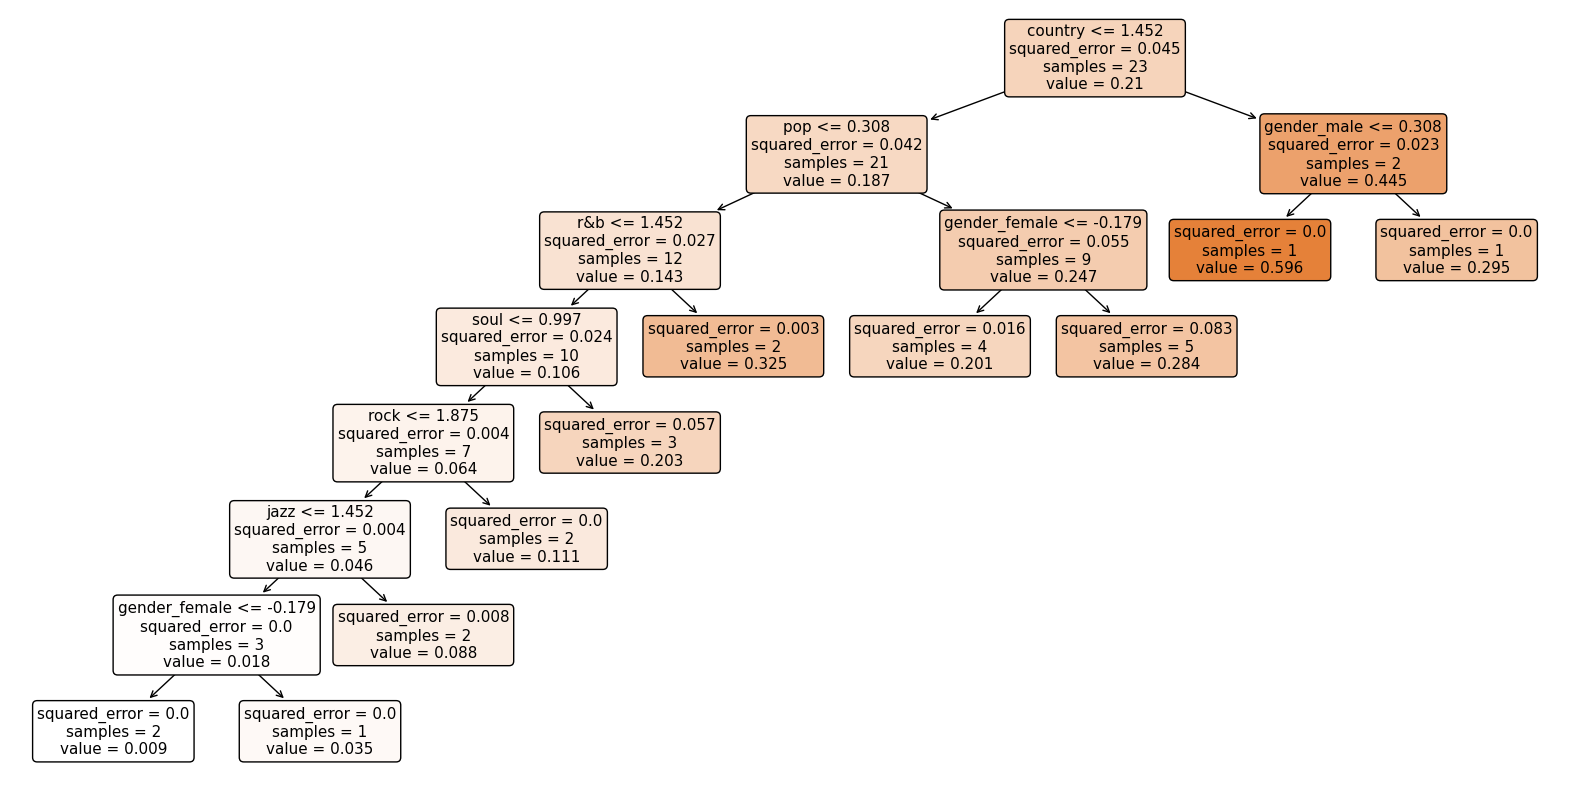

In [283]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(tree_clf, filled=True, feature_names=x.columns.tolist(), rounded=True)
plt.show()

### Feature Importances 

In [284]:
# finding the features that have the most prominene in the decison tree's predictions

dt_feature_importance = pd.Series(tree_clf.feature_importances_, index = x.columns)
top_20_dt = dt_feature_importance.nlargest(10)

print("----------------------------------------------")
print("The Top 10 Variable Importance - Decision Tree")
print("----------------------------------------------")
print(top_20_dt)

----------------------------------------------
The Top 10 Variable Importance - Decision Tree
----------------------------------------------
country              0.327925
r&b                  0.215902
pop                  0.150832
gender_male          0.121909
soul                 0.109225
gender_female        0.041894
rock                 0.016279
jazz                 0.016034
alternative_metal    0.000000
hip-hop              0.000000
dtype: float64
